# DATA CLEANING & EDA

## Crude Oil Dataset Description

The dataset consists of **114 crude oil blends**. Each crude assay provides a detailed characterization of the crude’s physical, chemical, and distillation-based properties.

### 1. Independent Variables (Features)
These variables represent the input data used to characterize the crude oil blends.

| Category | Variable Name | Unit | Description |
| :--- | :--- | :--- | :--- |
| **Bulk Physical & Chemical** | `StdLiquidDensity` | kg/m³ | Standard liquid density of the crude. |
| | `SulfurByWt` | % | Total sulfur content by weight. |
| | `ConradsonCarbonByWt` | % | Carbon residue remaining after evaporation/pyrolysis. |
| | `NitrogenByWt` | % | Total nitrogen content by weight. |
| **Distillation Curve (TBP)** | **TBP Cut Points** | °C / °F | The temperature at which specific volume percentages boil off. |
| | *Fractions* | | 1%, 5%, 10%, 30%, 50%, 70%, 90%, 95%, 99% |

### 2. Target Variables (Outputs)
These are the properties targeted for prediction based on the independent variables.

#### 2.1 Set 1: Hydrocarbon Composition
| Variable Name | Description | Unit |
| :--- | :--- | :--- |
| `AromByWt` | Aromatics content by weight | % |
| `NaphthenesByWt` | Naphthenes content by weight | % |
| `ParaffinsByWt` | Paraffins content by weight | % |

#### 2.2 Set 2: Kinematic Viscosity (Primary Targets)
| Variable Name | Condition | Unit |
| :--- | :--- | :--- |
| `KinematicViscosity` | @ 37.78°C (100°F) | cSt |
| `KinematicViscosity` | @ 98.89°C (210°F) | cSt |

#### 2.3 Set 3: Additional Viscosity Targets (Sparse/If Available)
| Variable Name | Condition | Unit |
| :--- | :--- | :--- |
| `KinematicViscosity` | @ 20°C | cSt |
| `KinematicViscosity` | @ 40°C | cSt |
| `KinematicViscosity` | @ 50°C | cSt |
| `KinematicViscosity` | @ 100°C | cSt |
| `KinematicViscosity` | @ 150°C | cSt |

### 1. Import Data and Required Packages
####  1.1 Importing Pandas, Numpy, Matplotlib, Seaborn and Warings Library.

In [133]:
#Importing Packages
import numpy as np
import pandas as pd
import scipy.stats as stats
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

#### 1.2 Importing Extracted Data from 53 Crude Assays

In [134]:
#Importing CSV data as Pandas dataframe
df=pd.read_csv('dataset/Extracted_CrudeData.csv')

### 2. Dataset Description

In [135]:
#Show top 5 rows of the dataframe
df.head()

Crude Name  StdLiquidDensity (kg/m3)  SulfurByWt (%)  \
0  Achinsk-2015                926.440713       24.606786   
1     Akpo-2014                794.689603        0.070591   
2     Alba-1994                937.762899        1.322111   
3     Alba-2002                932.299296        1.188621   
4     Alba-2012                934.718850        1.254322   

   ConradsonCarbonByWt (%)  NitrogenByWt (%)  \
0                 5.827369          0.209874   
1                 0.732083          0.062825   
2                 5.847739          0.196515   
3                 4.615622          0.226565   
4                 7.296455          0.220453   

   Distillation Mass @ X Pct (C)@ 1 (%) - TBP  \
0                                  -17.813183   
1                                  -16.244551   
2                                  159.292817   
3                                  123.671482   
4                                  127.209059   

   Distillation Mass @ X Pct (C)@ 5 (%) - TBP  \
0                                   99.504433   
1                                   24.679712   
2                                  225.625562   
3                                  208.861673   
4                                  191.668726   

   Distillation Mass @ X Pct (C)@ 10 (%) - TBP  \
0                                   239.896662   
1                                    74.031996   
2                                   264.407311   
3                                   254.256413   
4                                   241.194850   

   Distillation Mass @ X Pct (C)@ 30 (%) - TBP  \
0                                   398.590562   
1                                   147.692242   
2                                   363.170601   
3                                   357.502064   
4                                   350.718785   

   Distillation Mass @ X Pct (C)@ 50 (%) - TBP  ...  AromByWt (%)  \
0                                   481.984170  ...     80.470529   
1                                   231.447841  ...     24.571141   
2                                   470.497570  ...     45.113632   
3                                   459.755466  ...     43.692823   
4                                   450.253389  ...     36.755820   

   NaphthenesByWt (%)  ParaffinsByWt (%)  KinematicViscosity (cSt)@ 37.78 (C)  \
0           15.097104           4.432367                     57.2992918615153   
1           41.011754          34.417105                      1.7573028543796   
2           53.390135           1.496234                     208.950655083803   
3           54.136415           2.170762                     57.5107882851462   
4           60.660536           2.583644                      74.735481797634   

   KinematicViscosity (cSt)@ 98.89 (C)  KinematicViscosity (cSt)@ 20 (C)  \
0                     7.64442822441154                        138.700886   
1                    0.833437569080932                          2.091216   
2                      7.7853062269412                       1077.054144   
3                     7.38119815238387                               NaN   
4                     8.27927920440891                               NaN   

   KinematicViscosity (cSt)@ 40 (C) KinematicViscosity (cSt)@ 50 (C)  \
0                         52.450950                        34.581349   
1                          1.700584                         1.443025   
2                        178.565076                        53.097085   
3                         52.597843                        34.537234   
4                         67.443091                        41.725218   

  KinematicViscosity (cSt)@ 100 (C)  KinematicViscosity (cSt)@ 150 (C)  
0                          7.453127                                NaN  
1                          0.824673                                NaN  
2                               NaN                                NaN  
3                          7.178422                                NaN  


In [136]:
#Shape of dataset
df.shape

(114, 24)

There are 114 columns and 24 rows

#### Renaming Columns

In [137]:
#Renaming columns
df.rename(columns={
    'Crude Name': 'Crude_Name',
    'StdLiquidDensity (kg/m3)': 'StdLiqDensity_kgm3',
    'SulfurByWt (%)': 'SulfurWt_pct',
    'ConradsonCarbonByWt (%)': 'ConradsonCarbon_wt_pct',
    'NitrogenByWt (%)': 'NitrogenWt_pct',
    
    'Distillation Mass @ X Pct (C)@ 1 (%) - TBP': 'TBP_TempAt_1pct',
    'Distillation Mass @ X Pct (C)@ 5 (%) - TBP': 'TBP_TempAt_5pct',
    'Distillation Mass @ X Pct (C)@ 10 (%) - TBP': 'TBP_TempAt_10pct',
    'Distillation Mass @ X Pct (C)@ 30 (%) - TBP': 'TBP_TempAt_30pct',
    'Distillation Mass @ X Pct (C)@ 50 (%) - TBP': 'TBP_TempAt_50pct',
    'Distillation Mass @ X Pct (C)@ 70 (%) - TBP': 'TBP_TempAt_70pct',
    'Distillation Mass @ X Pct (C)@ 90 (%) - TBP': 'TBP_TempAt_90pct',
    'Distillation Mass @ X Pct (C)@ 95 (%) - TBP': 'TBP_TempAt_95pct',
    'Distillation Mass @ X Pct (C)@ 99 (%) - TBP': 'TBP_TempAt_99pct',

    'AromByWt (%)': 'AromWt_pct',
    'NaphthenesByWt (%)': 'NaphWt_pct',
    'ParaffinsByWt (%)': 'ParaWt_pct',

    'KinematicViscosity (cSt)@ 37.78 (C)': 'KV_37.78c_cSt',
    'KinematicViscosity (cSt)@ 98.89 (C)': 'KV_98.89c_cSt',
    'KinematicViscosity (cSt)@ 20 (C)': 'KV_20c_cSt',
    'KinematicViscosity (cSt)@ 40 (C)': 'KV_40c_cSt',
    'KinematicViscosity (cSt)@ 50 (C)': 'KV_50c_cSt',
    'KinematicViscosity (cSt)@ 100 (C)': 'KV_100c_cSt',
    'KinematicViscosity (cSt)@ 150 (C)': 'KV_150c_cSt'
}, inplace=True)
df.head()


Crude_Name  StdLiqDensity_kgm3  SulfurWt_pct  ConradsonCarbon_wt_pct  \
0  Achinsk-2015          926.440713     24.606786                5.827369   
1     Akpo-2014          794.689603      0.070591                0.732083   
2     Alba-1994          937.762899      1.322111                5.847739   
3     Alba-2002          932.299296      1.188621                4.615622   
4     Alba-2012          934.718850      1.254322                7.296455   

   NitrogenWt_pct  TBP_TempAt_1pct  TBP_TempAt_5pct  TBP_TempAt_10pct  \
0        0.209874       -17.813183        99.504433        239.896662   
1        0.062825       -16.244551        24.679712         74.031996   
2        0.196515       159.292817       225.625562        264.407311   
3        0.226565       123.671482       208.861673        254.256413   
4        0.220453       127.209059       191.668726        241.194850   

   TBP_TempAt_30pct  TBP_TempAt_50pct  ...  AromWt_pct  NaphWt_pct  \
0        398.590562        481.984170  ...   80.470529   15.097104   
1        147.692242        231.447841  ...   24.571141   41.011754   
2        363.170601        470.497570  ...   45.113632   53.390135   
3        357.502064        459.755466  ...   43.692823   54.136415   
4        350.718785        450.253389  ...   36.755820   60.660536   

   ParaWt_pct     KV_37.78c_cSt      KV_98.89c_cSt   KV_20c_cSt  KV_40c_cSt  \
0    4.432367  57.2992918615153   7.64442822441154   138.700886   52.450950   
1   34.417105   1.7573028543796  0.833437569080932     2.091216    1.700584   
2    1.496234  208.950655083803    7.7853062269412  1077.054144  178.565076   
3    2.170762  57.5107882851462   7.38119815238387          NaN   52.597843   
4    2.583644   74.735481797634   8.27927920440891          NaN   67.443091   

  KV_50c_cSt KV_100c_cSt  KV_150c_cSt  
0  34.581349    7.453127          NaN  
1   1.443025    0.824673          NaN  
2  53.097085         NaN          NaN  
3  34.537234    7.178422          NaN  
4  41.725218    8.042583          NaN  

[5 rows x 24 columns]

### 3. Data Checks
#### 3.1 Check for Duplicate Values

In [138]:
#Checks for duplicate values
df.duplicated().sum()

np.int64(0)

There are no duplicate values.

#### 3.2 Check for Missing Values

In [139]:
#Checks for missing values
df.isna().sum()

Crude_Name                  0
StdLiqDensity_kgm3          0
SulfurWt_pct                0
ConradsonCarbon_wt_pct      0
NitrogenWt_pct              0
TBP_TempAt_1pct             0
TBP_TempAt_5pct             0
TBP_TempAt_10pct            0
TBP_TempAt_30pct            0
TBP_TempAt_50pct            0
TBP_TempAt_70pct            0
TBP_TempAt_90pct            0
TBP_TempAt_95pct            0
TBP_TempAt_99pct            0
AromWt_pct                  0
NaphWt_pct                  0
ParaWt_pct                  0
KV_37.78c_cSt               0
KV_98.89c_cSt               0
KV_20c_cSt                 46
KV_40c_cSt                 38
KV_50c_cSt                 22
KV_100c_cSt                32
KV_150c_cSt               101
dtype: int64

In [140]:
#Deleting columns with more than 50% missing values
df.drop(columns='KV_150c_cSt', inplace=True)
df.shape

(114, 23)

#### 3.3 Check Data Types

In [141]:
#Exploring data types
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 114 entries, 0 to 113
Data columns (total 23 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Crude_Name              114 non-null    object 
 1   StdLiqDensity_kgm3      114 non-null    float64
 2   SulfurWt_pct            114 non-null    float64
 3   ConradsonCarbon_wt_pct  114 non-null    float64
 4   NitrogenWt_pct          114 non-null    float64
 5   TBP_TempAt_1pct         114 non-null    float64
 6   TBP_TempAt_5pct         114 non-null    float64
 7   TBP_TempAt_10pct        114 non-null    float64
 8   TBP_TempAt_30pct        114 non-null    float64
 9   TBP_TempAt_50pct        114 non-null    float64
 10  TBP_TempAt_70pct        114 non-null    float64
 11  TBP_TempAt_90pct        114 non-null    float64
 12  TBP_TempAt_95pct        114 non-null    float64
 13  TBP_TempAt_99pct        114 non-null    float64
 14  AromWt_pct              114 non-null    fl

The column *KinematicViscosity (cSt)@ 37.78 (C)* shows datatype as object.

In [142]:
#Changing data types
df["KV_37.78c_cSt"] = pd.to_numeric(df["KV_37.78c_cSt"], errors="coerce")
df["KV_98.89c_cSt"] = pd.to_numeric(df["KV_98.89c_cSt"], errors="coerce")

In [143]:
#Numerical & categorical columns
numeric_features = [feature for feature in df.columns if df[feature].dtype != 'O']
categorical_features = [feature for feature in df.columns if df[feature].dtype == 'O']

print('We have {} numerical features : {}'.format(len(numeric_features), numeric_features))
print('\nWe have {} categorical features : {}'.format(len(categorical_features), categorical_features))

We have 22 numerical features : ['StdLiqDensity_kgm3', 'SulfurWt_pct', 'ConradsonCarbon_wt_pct', 'NitrogenWt_pct', 'TBP_TempAt_1pct', 'TBP_TempAt_5pct', 'TBP_TempAt_10pct', 'TBP_TempAt_30pct', 'TBP_TempAt_50pct', 'TBP_TempAt_70pct', 'TBP_TempAt_90pct', 'TBP_TempAt_95pct', 'TBP_TempAt_99pct', 'AromWt_pct', 'NaphWt_pct', 'ParaWt_pct', 'KV_37.78c_cSt', 'KV_98.89c_cSt', 'KV_20c_cSt', 'KV_40c_cSt', 'KV_50c_cSt', 'KV_100c_cSt']

We have 1 categorical features : ['Crude_Name']


#### 3.4 Check Unique Values

In [144]:
#Check unique values
df.nunique()

Crude_Name                114
StdLiqDensity_kgm3        114
SulfurWt_pct              114
ConradsonCarbon_wt_pct    114
NitrogenWt_pct            111
TBP_TempAt_1pct           114
TBP_TempAt_5pct           114
TBP_TempAt_10pct          114
TBP_TempAt_30pct          114
TBP_TempAt_50pct          114
TBP_TempAt_70pct          114
TBP_TempAt_90pct          114
TBP_TempAt_95pct          114
TBP_TempAt_99pct          114
AromWt_pct                114
NaphWt_pct                114
ParaWt_pct                114
KV_37.78c_cSt             109
KV_98.89c_cSt             112
KV_20c_cSt                 68
KV_40c_cSt                 76
KV_50c_cSt                 92
KV_100c_cSt                82
dtype: int64

#### 3.5 Check Data Statistics

In [145]:
df.describe()

StdLiqDensity_kgm3  SulfurWt_pct  ConradsonCarbon_wt_pct  \
count          114.000000    114.000000              114.000000   
mean           911.183155      2.588554                7.777829   
std             62.270467      3.545317                5.402254   
min            720.475090      0.003066                0.000859   
25%            870.192887      0.389044                4.265128   
50%            928.991186      1.691463                6.770968   
75%            951.802090      3.508104               11.503868   
max           1030.171649     24.606786               28.223030   

       NitrogenWt_pct  TBP_TempAt_1pct  TBP_TempAt_5pct  TBP_TempAt_10pct  \
count      114.000000       114.000000       114.000000        114.000000   
mean         0.249874        56.753527       130.631442        180.238812   
std          0.165850        63.588849        71.754399         80.303087   
min          0.000000       -84.112295        12.470906         33.973020   
25%          0.125091        15.277391        72.923914        114.519203   
50%          0.229044        47.935556       118.746033        183.532131   
75%          0.353490        79.549146       174.645950        237.036776   
max          0.703527       292.828624       385.253498        497.464122   

       TBP_TempAt_30pct  TBP_TempAt_50pct  TBP_TempAt_70pct  ...  \
count        114.000000        114.000000        114.000000  ...   
mean         313.718924        426.257724        543.845321  ...   
std           98.906679        119.094365        138.646107  ...   
min           71.475104        101.998436        121.594913  ...   
25%          249.316137        354.567378        469.661796  ...   
50%          332.999865        448.591646        554.099607  ...   
75%          375.907067        501.895457        624.179194  ...   
max          767.378662        956.072090       1115.794740  ...   

       TBP_TempAt_99pct  AromWt_pct  NaphWt_pct  ParaWt_pct  KV_37.78c_cSt  \
count        114.000000  114.000000  114.000000  114.000000   1.090000e+02   
mean         941.833727   48.799900   37.916722   13.283718   1.189866e+04   
std          197.412976   21.173578   19.205966   11.227181   1.169141e+05   
min          246.584172   12.084214    1.139281    0.196860   6.871622e-01   
25%          810.091097   32.498046   23.703453    4.472868   6.771371e+00   
50%          953.144216   45.552235   41.439945   10.677140   5.402304e+01   
75%         1057.750327   61.242724   50.894595   18.522450   1.695572e+02   
max         1342.569563   98.662859   76.677605   57.447748   1.221133e+06   

       KV_98.89c_cSt    KV_20c_cSt     KV_40c_cSt     KV_50c_cSt  KV_100c_cSt  
count     112.000000  6.800000e+01      76.000000      92.000000    82.000000  
mean       22.049577  5.021224e+05   11643.264561    2119.905113    21.336528  
std        90.864829  4.102196e+06   97344.256850   16492.733925    93.697838  
min         0.441290  7.087801e-01       0.673395       0.608967     0.438059  
25%         2.088348  1.022949e+01       6.300331       5.048923     1.981103  
50%         6.729713  1.280998e+02      46.674598      33.222985     7.070277  
75%        12.517947  5.317433e+02     117.531992      98.246710    12.239843  
max       945.937902  3.383193e+07  849028.824447  158136.486477   847.665965  

[8 rows x 22 columns]

#### Data Quality Checks

- Non-negative Property Values
- Monotonic increase of TBP distillation temperatures
- Hydrocarbon composition to approximately 100 wt%

In [146]:
#Columns that must be non-negative
nonnegative_cols = [
    'StdLiqDensity_kgm3',
    'SulfurWt_pct',
    'NitrogenWt_pct',
    'ConradsonCarbon_wt_pct',
    'AromWt_pct',
    'NaphWt_pct',
    'ParaWt_pct',
    'KV_20c_cSt',
    'KV_40c_cSt',
    'KV_50c_cSt',
    'KV_100c_cSt'
]
for col in nonnegative_cols:
    invalid_count = (df[col] < 0).sum()
    print(f"'{col}' = {invalid_count} negative values.") 

'StdLiqDensity_kgm3' = 0 negative values.
'SulfurWt_pct' = 0 negative values.
'NitrogenWt_pct' = 0 negative values.
'ConradsonCarbon_wt_pct' = 0 negative values.
'AromWt_pct' = 0 negative values.
'NaphWt_pct' = 0 negative values.
'ParaWt_pct' = 0 negative values.
'KV_20c_cSt' = 0 negative values.
'KV_40c_cSt' = 0 negative values.
'KV_50c_cSt' = 0 negative values.
'KV_100c_cSt' = 0 negative values.


In [147]:
#Check if any TBP temperature decreases across columns
TBP_cols = [
    'TBP_TempAt_1pct',
    'TBP_TempAt_5pct',
    'TBP_TempAt_10pct',
    'TBP_TempAt_30pct',
    'TBP_TempAt_50pct',
    'TBP_TempAt_70pct',
    'TBP_TempAt_90pct',
    'TBP_TempAt_95pct',
    'TBP_TempAt_99pct'
]

tbp_violations = (df[TBP_cols] < df[TBP_cols].shift(axis=1)).any(axis=1)
print(f"Number of rows with TBP temperature violations",tbp_violations.sum())

Number of rows with TBP temperature violations 0


In [148]:
#Sum of aromatics + naphthenes + paraffins = 100%
df['Composition'] = df[['AromWt_pct', 'NaphWt_pct', 'ParaWt_pct']].sum(axis=1)

#Check outside tolerance (95–105%)
composition_violations = (df['Composition'] < 95) | (df['Composition'] > 105)
print("Composition sum violations:", composition_violations.sum())


Composition sum violations: 0


### 4. Data Visualization


### 4.1 UNIVARIATE ANALYSIS
#### 4.1.1 Histogram with KDE

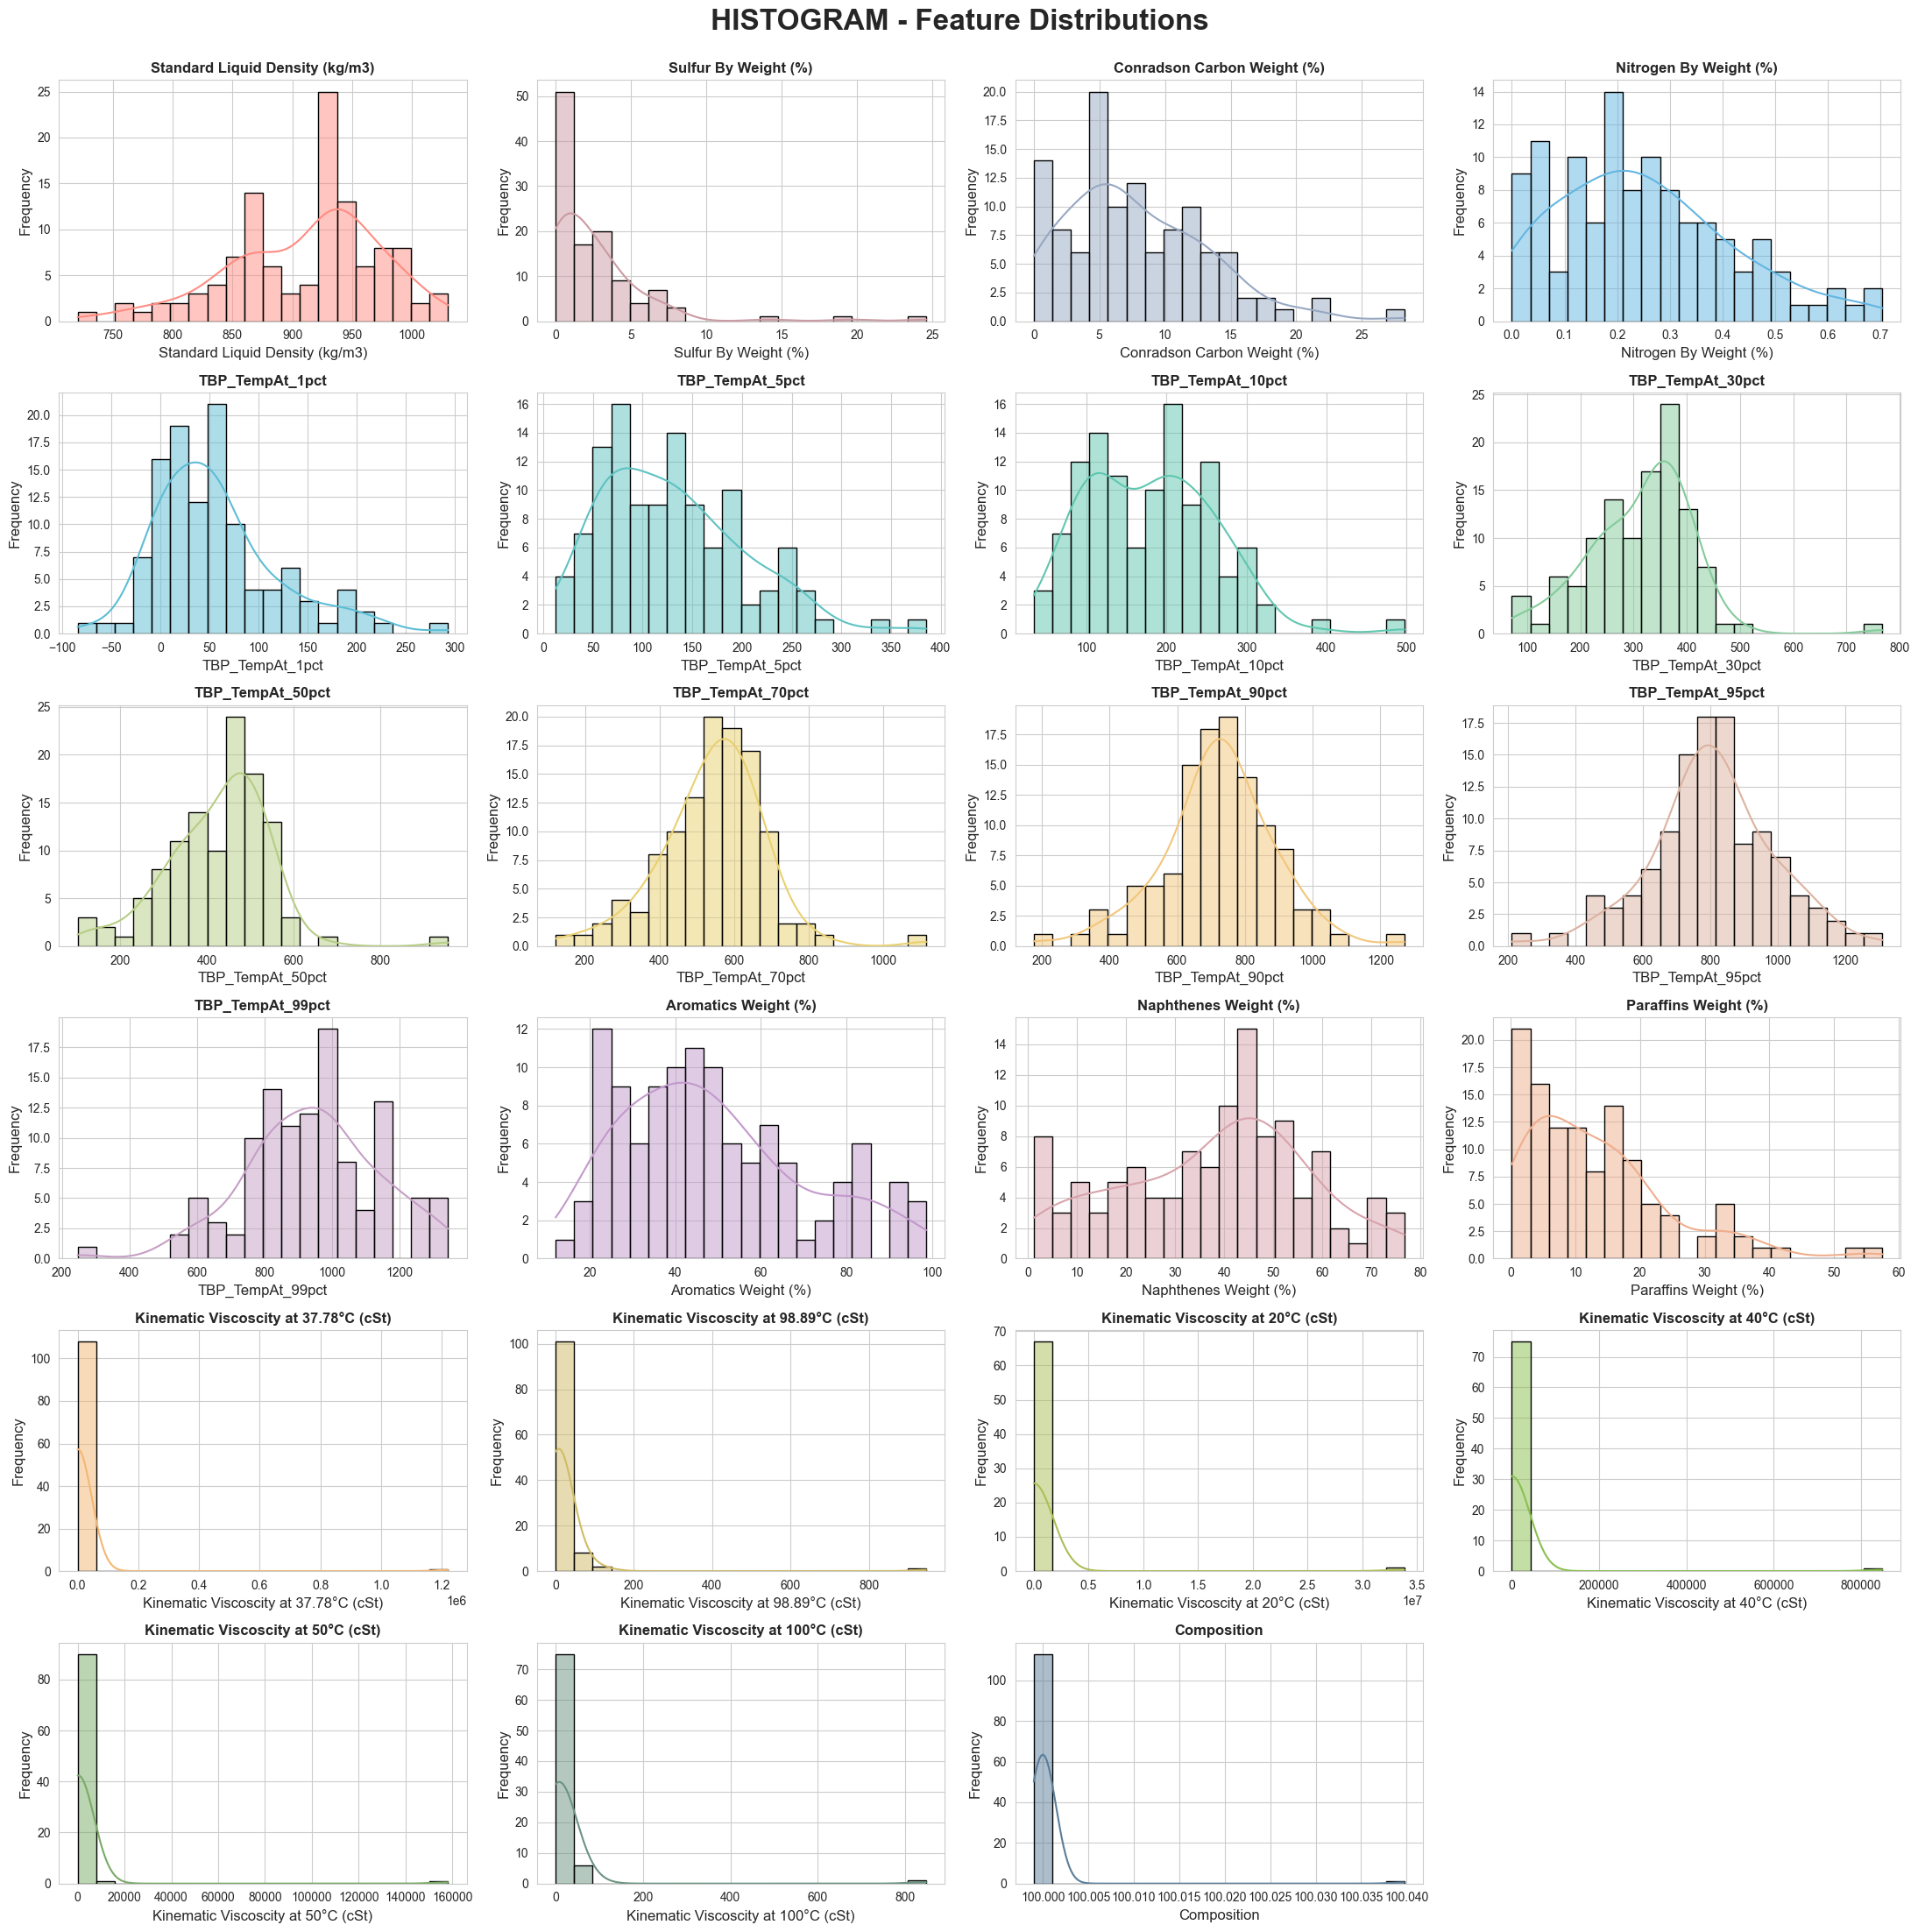

In [149]:
#Plotting Histograms for all features
columns = [
    ('StdLiqDensity_kgm3', '#ff8c82', 'Standard Liquid Density (kg/m3)'),
    ('SulfurWt_pct', '#cb9aa2', 'Sulfur By Weight (%)'),
    ('ConradsonCarbon_wt_pct', '#97a8c2', 'Conradson Carbon Weight (%)'),
    ('NitrogenWt_pct', '#63b6e1', 'Nitrogen By Weight (%)'),
    ('TBP_TempAt_1pct', '#5dbdd5', 'TBP_TempAt_1pct'),
    ('TBP_TempAt_5pct', '#5ec2c2', 'TBP_TempAt_5pct'),
    ('TBP_TempAt_10pct', '#5fc7af', 'TBP_TempAt_10pct'),
    ('TBP_TempAt_30pct', '#83cb9a', 'TBP_TempAt_30pct'),
    ('TBP_TempAt_50pct', '#b6cd84', 'TBP_TempAt_50pct'),
    ('TBP_TempAt_70pct', '#e9d06f', 'TBP_TempAt_70pct'),
    ('TBP_TempAt_90pct', '#f2c67b', 'TBP_TempAt_90pct'),
    ('TBP_TempAt_95pct', '#dcb2a0', 'TBP_TempAt_95pct'),
    ('TBP_TempAt_99pct', '#c59fc4', 'TBP_TempAt_99pct'),
    ('AromWt_pct', '#c299cc', 'Aromatics Weight (%)'),
    ('NaphWt_pct', '#d8a3ac', 'Naphthenes Weight (%)'),
    ('ParaWt_pct', '#efae8d', 'Paraffins Weight (%)'),
    ('KV_37.78c_cSt', '#f4b773', 'Kinematic Viscoscity at 37.78°C (cSt)'),
    ('KV_98.89c_cSt', '#d0bb65', 'Kinematic Viscoscity at 98.89°C (cSt)'),
    ('KV_20c_cSt', '#abbf56', 'Kinematic Viscoscity at 20°C (cSt)'),
    ('KV_40c_cSt', '#89c04e', 'Kinematic Viscoscity at 40°C (cSt)'),
    ('KV_50c_cSt', '#79aa67', 'Kinematic Viscoscity at 50°C (cSt)'),
    ('KV_100c_cSt', '#6a9381', 'Kinematic Viscoscity at 100°C (cSt)'),
    ('Composition', '#5a7d9a', 'Composition')
]

sns.set_style("whitegrid")

fig, axes = plt.subplots(6, 4, figsize=(22, 22))
fig.suptitle("HISTOGRAM - Feature Distributions", fontsize=24, fontweight="bold",y=1)
axes = axes.flatten()
for ax in axes[len(columns):]:
    ax.axis('off')

for ax, (col, color, title) in zip(axes, columns):
    sns.histplot(df[col], bins=20, color=color, kde=True, ax=ax, edgecolor='black')
    ax.set_xlabel(title, fontsize=12)
    ax.set_ylabel("Frequency", fontsize=12)
    ax.set_title(f"{title}", fontsize=12, fontweight="bold")
plt.tight_layout()
plt.show()

- Sulfur & Viscosity: These are Right-Skewed (Positive Skew)
- TBP Temperatures: The temperatures at 30%, 50%, and 70% distillation are normally distributed, meaning the boiling points are consistent across most crudes


#### 4.1.2 Boxplot

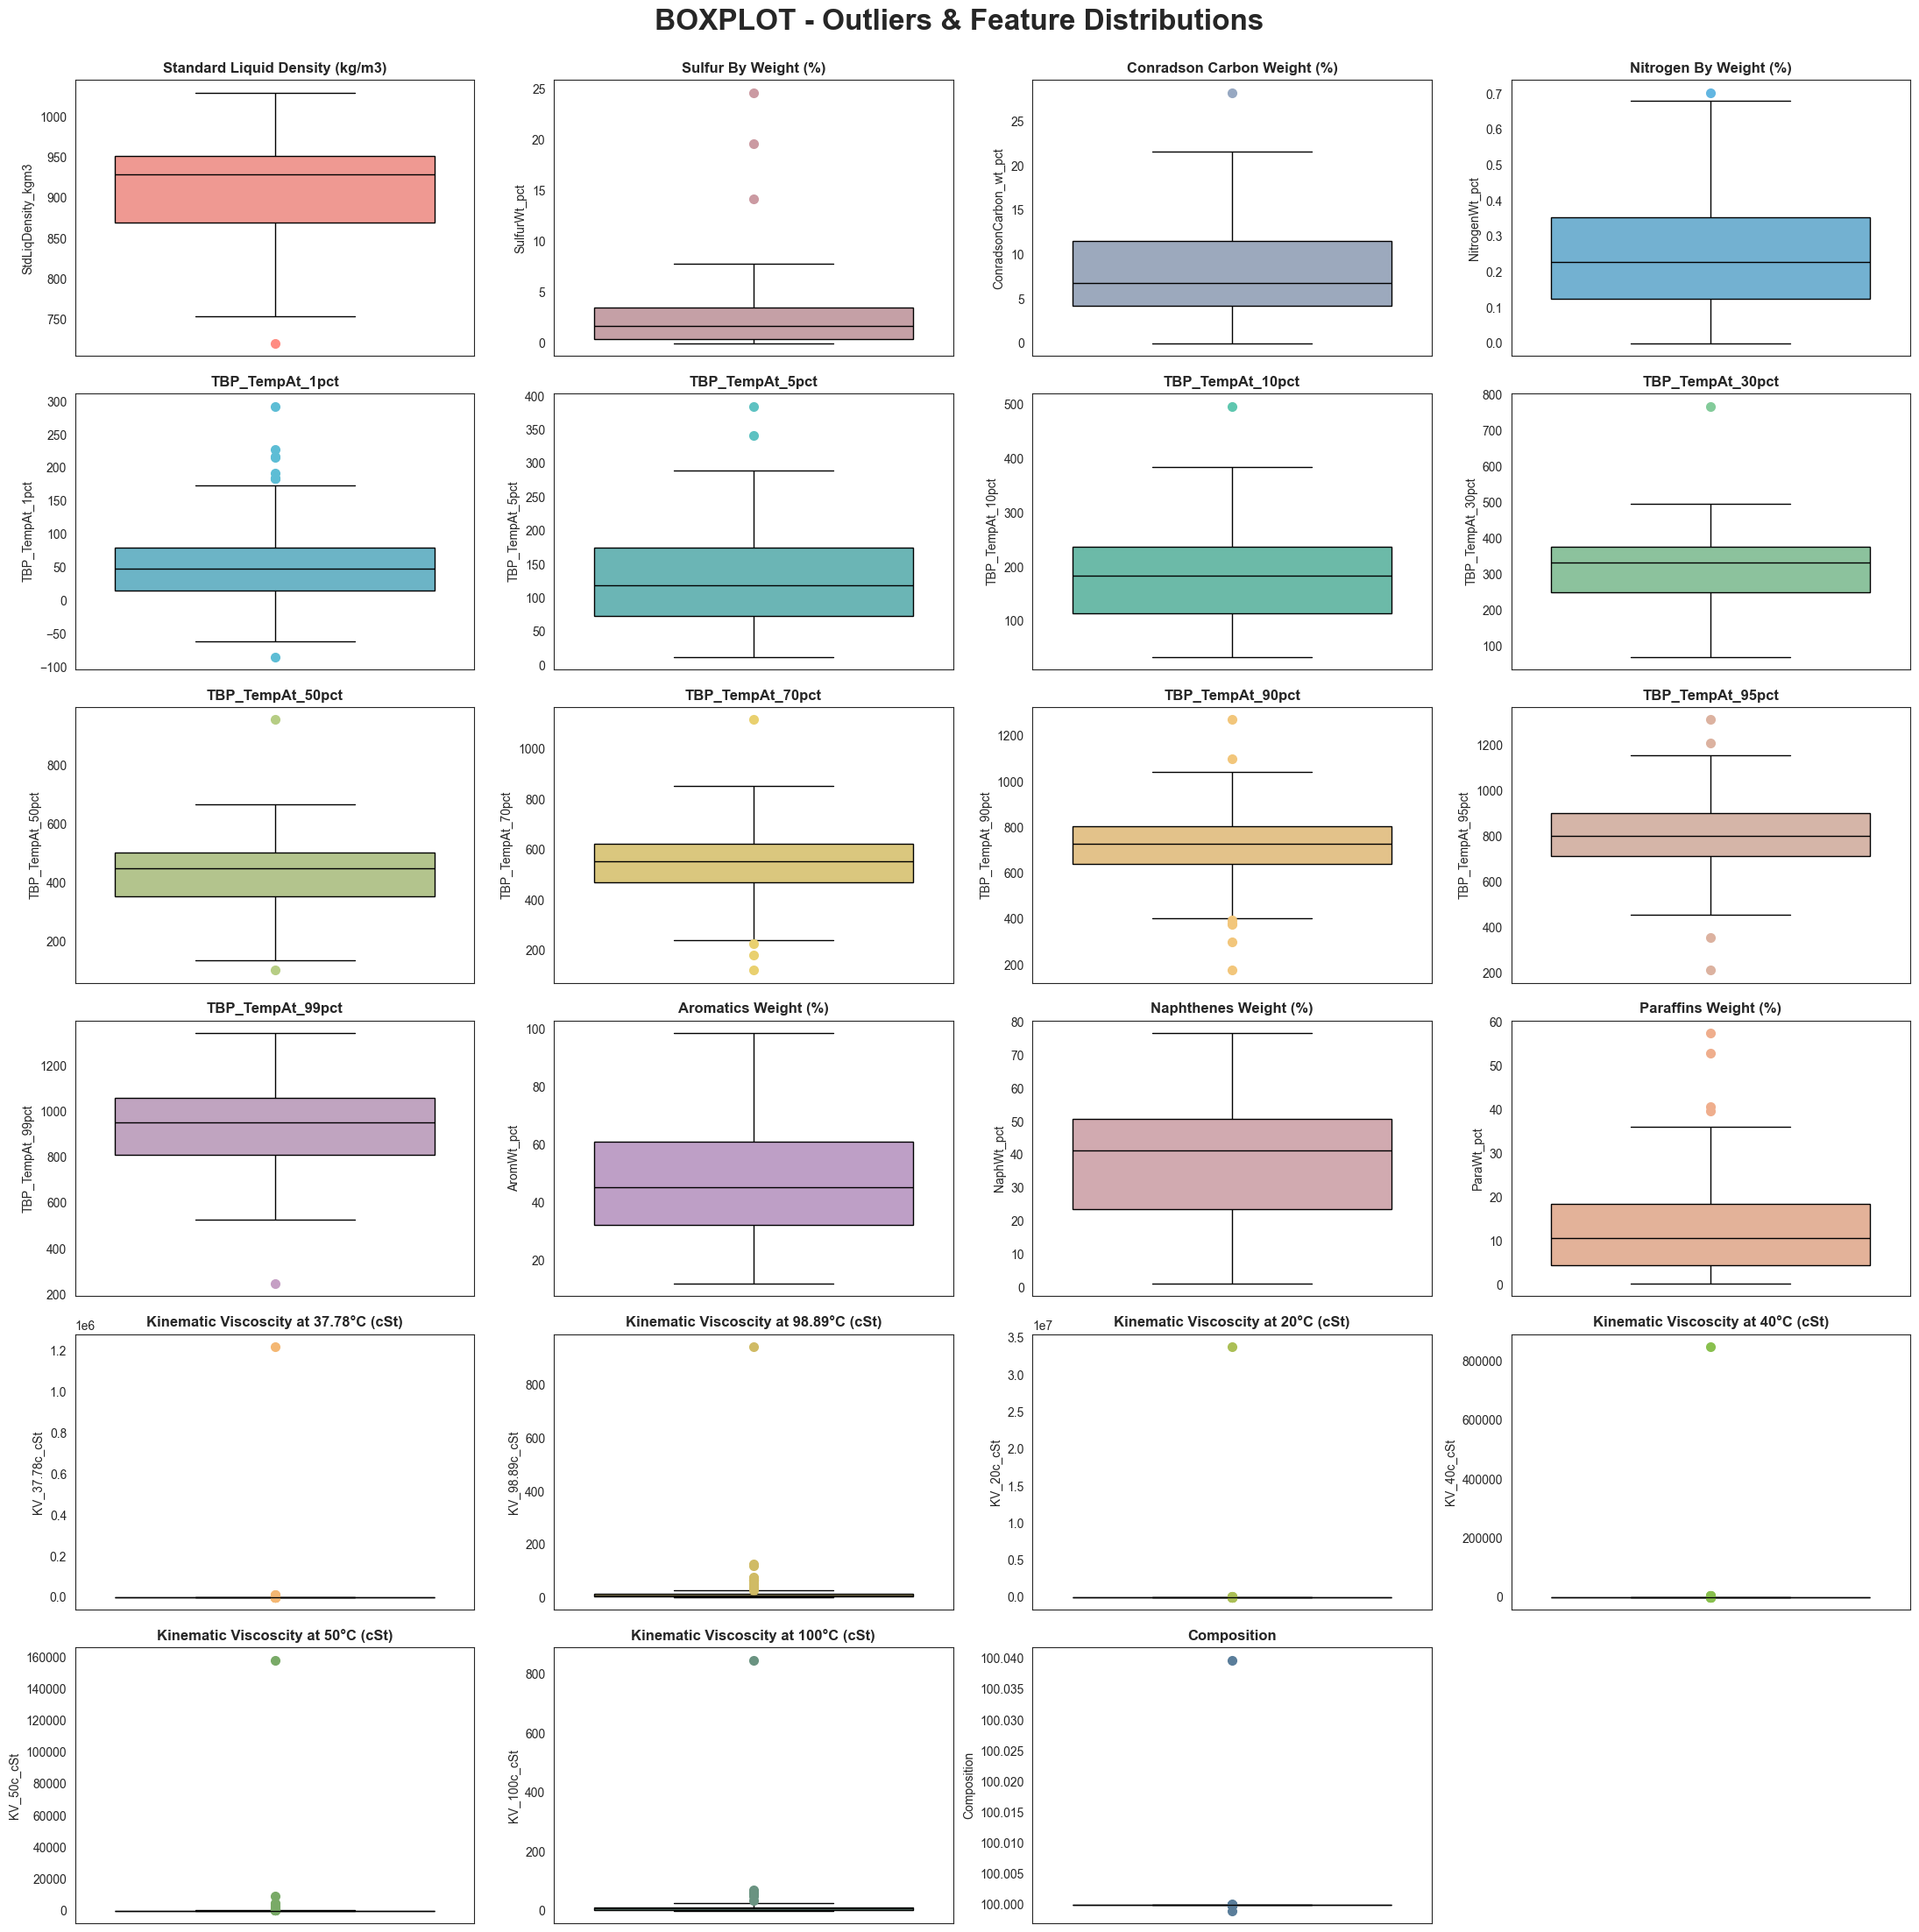

In [150]:
#Plotting Boxplot to detect outliers
sns.set_style("white")
columns = [
    ('StdLiqDensity_kgm3', '#ff8c82', 'Standard Liquid Density (kg/m3)'),
    ('SulfurWt_pct', '#cb9aa2', 'Sulfur By Weight (%)'),
    ('ConradsonCarbon_wt_pct', '#97a8c2', 'Conradson Carbon Weight (%)'),
    ('NitrogenWt_pct', '#63b6e1', 'Nitrogen By Weight (%)'),
    ('TBP_TempAt_1pct', '#5dbdd5', 'TBP_TempAt_1pct'),
    ('TBP_TempAt_5pct', '#5ec2c2', 'TBP_TempAt_5pct'),
    ('TBP_TempAt_10pct', '#5fc7af', 'TBP_TempAt_10pct'),
    ('TBP_TempAt_30pct', '#83cb9a', 'TBP_TempAt_30pct'),
    ('TBP_TempAt_50pct', '#b6cd84', 'TBP_TempAt_50pct'),
    ('TBP_TempAt_70pct', '#e9d06f', 'TBP_TempAt_70pct'),
    ('TBP_TempAt_90pct', '#f2c67b', 'TBP_TempAt_90pct'),
    ('TBP_TempAt_95pct', '#dcb2a0', 'TBP_TempAt_95pct'),
    ('TBP_TempAt_99pct', '#c59fc4', 'TBP_TempAt_99pct'),
    ('AromWt_pct', '#c299cc', 'Aromatics Weight (%)'),
    ('NaphWt_pct', '#d8a3ac', 'Naphthenes Weight (%)'),
    ('ParaWt_pct', '#efae8d', 'Paraffins Weight (%)'),
    ('KV_37.78c_cSt', '#f4b773', 'Kinematic Viscoscity at 37.78°C (cSt)'),
    ('KV_98.89c_cSt', '#d0bb65', 'Kinematic Viscoscity at 98.89°C (cSt)'),
    ('KV_20c_cSt', '#abbf56', 'Kinematic Viscoscity at 20°C (cSt)'),
    ('KV_40c_cSt', '#89c04e', 'Kinematic Viscoscity at 40°C (cSt)'),
    ('KV_50c_cSt', '#79aa67', 'Kinematic Viscoscity at 50°C (cSt)'),
    ('KV_100c_cSt', '#6a9381', 'Kinematic Viscoscity at 100°C (cSt)'),
    ('Composition', '#5a7d9a', 'Composition')
]

fig, axes = plt.subplots(6, 4, figsize=(22, 22))
fig.suptitle("BOXPLOT - Outliers & Feature Distributions", fontsize=24, fontweight="bold",y=1)
axes = axes.flatten()
for ax in axes[len(columns):]:
    ax.axis('off')

for ax, (col, color, title) in zip(axes, columns):
    sns.boxplot(df[col],color=color, boxprops=dict(edgecolor='black'), whiskerprops=dict(color='black'), 
                capprops=dict(color='black'), medianprops=dict(color='black'), flierprops=dict(markerfacecolor=color,
                markeredgecolor=color, markersize=7), ax=ax)
    ax.set_title(f"{title}", fontsize=12, fontweight="bold")
plt.tight_layout()
plt.show()

- Viscosity is extreme
- Density is stable
- Naphthenes are consistent

#### 4.1.3 Violin Plots

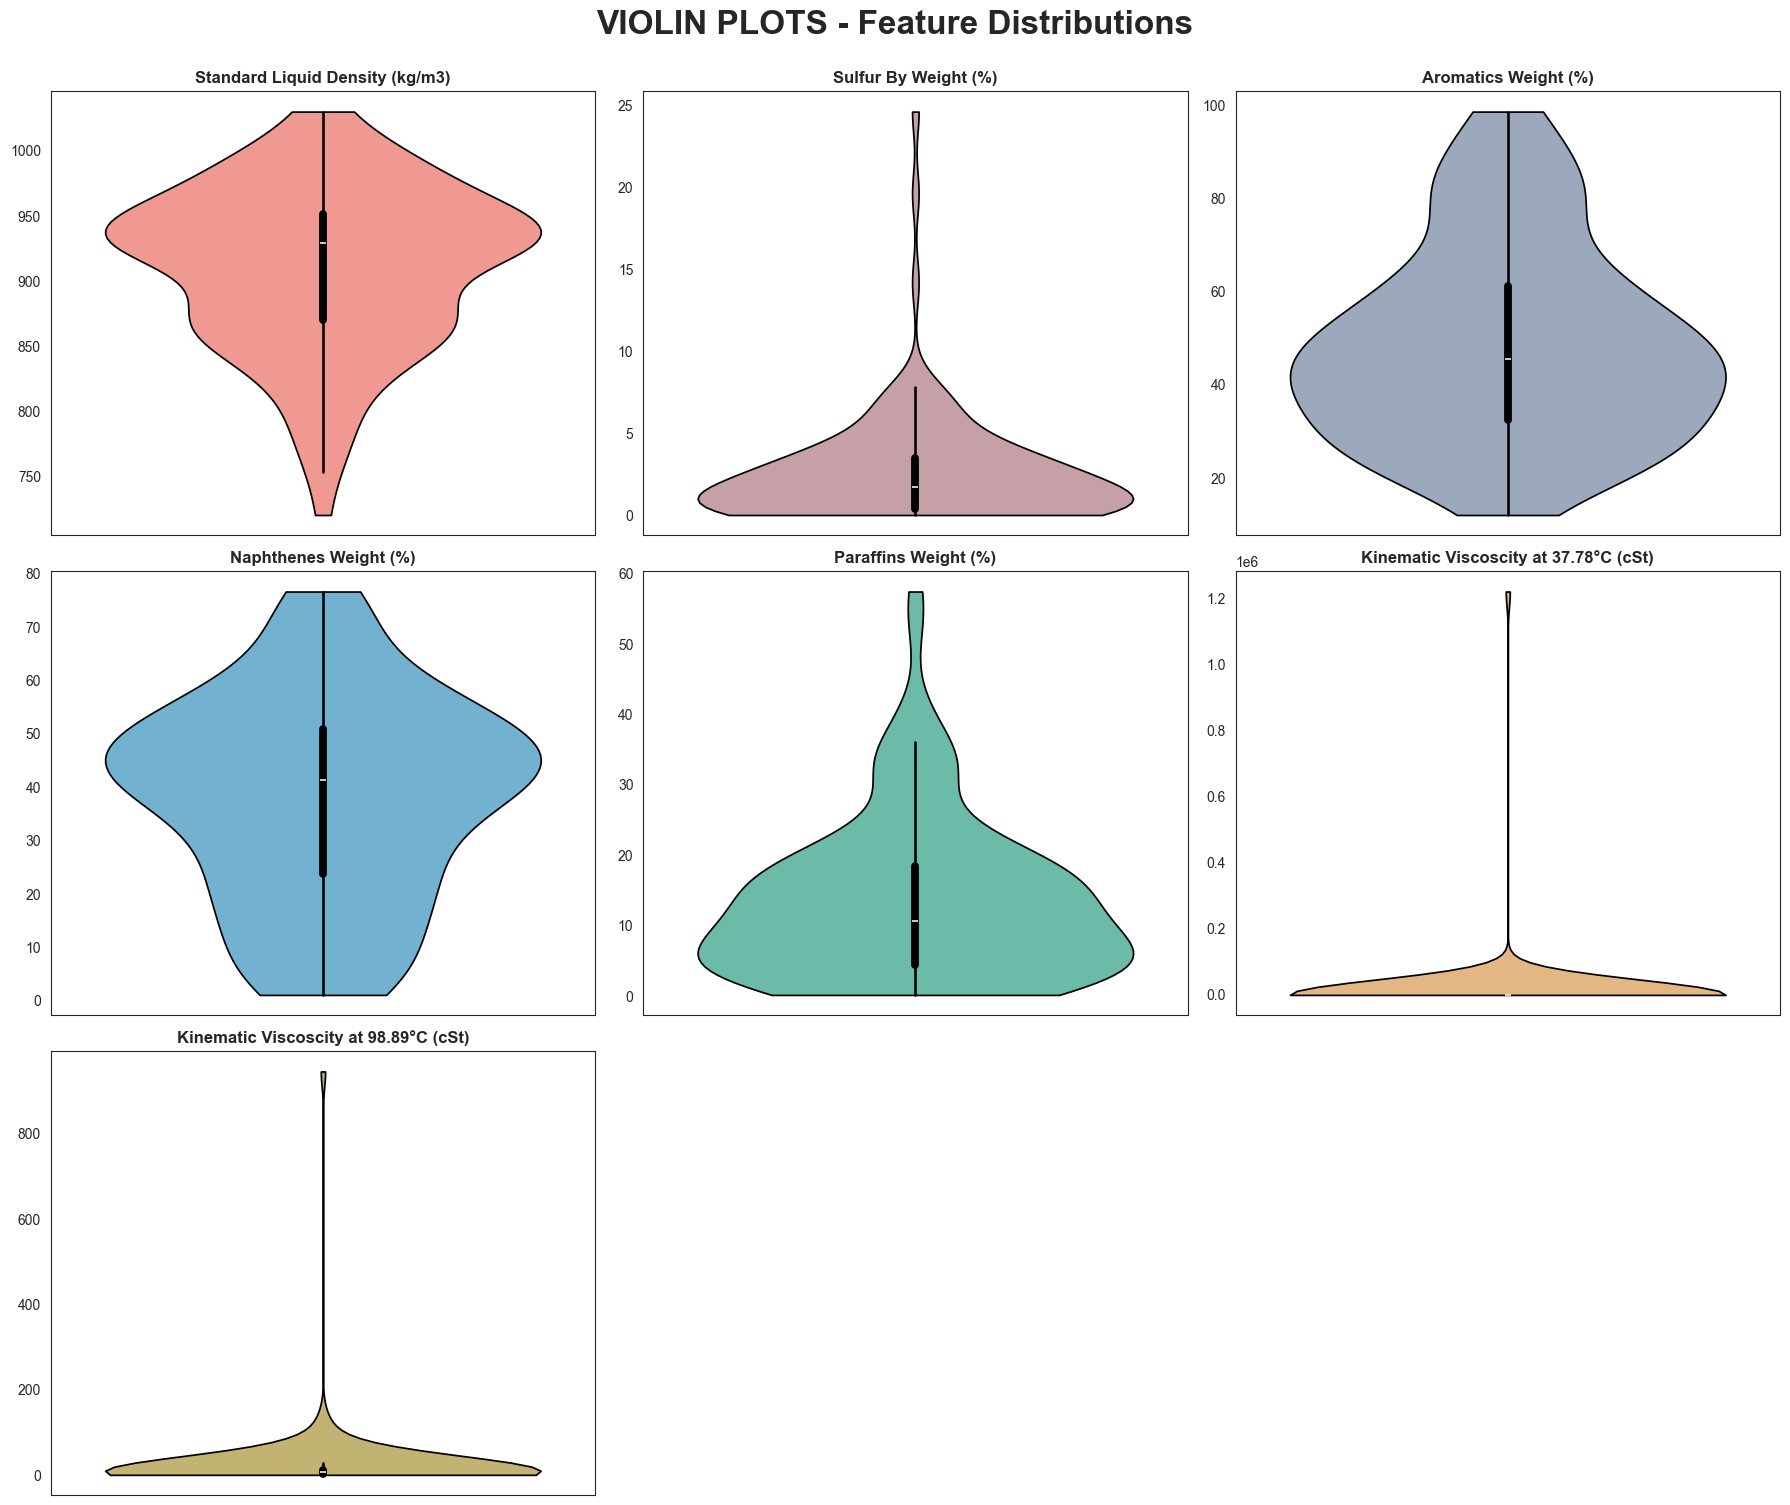

In [151]:
sns.set_style("white")

violin_cols = [
    ('StdLiqDensity_kgm3', '#ff8c82', 'Standard Liquid Density (kg/m3)'),
    ('SulfurWt_pct', '#cb9aa2', 'Sulfur By Weight (%)'),
    ('AromWt_pct','#97a8c2', 'Aromatics Weight (%)'),
    ('NaphWt_pct', '#63b6e1', 'Naphthenes Weight (%)'),
    ('ParaWt_pct', '#5fc7af', 'Paraffins Weight (%)'),
    ('KV_37.78c_cSt', '#f4b773', 'Kinematic Viscoscity at 37.78°C (cSt)'),
    ('KV_98.89c_cSt', '#d0bb65', 'Kinematic Viscoscity at 98.89°C (cSt)'),
]

fig, axes = plt.subplots(3, 3, figsize=(18, 15))
fig.suptitle("VIOLIN PLOTS - Feature Distributions", fontsize=24, fontweight="bold",y=1)
axes = axes.flatten()
for ax in axes[len(violin_cols):]:
    ax.axis('off')

for ax, (col, color, title) in zip(axes, violin_cols):
    sns.violinplot(df[col],color=color, inner="box", cut=0, ax=ax, edgecolor='black')
    ax.set_title(f"{title}", fontsize=12, fontweight="bold")
    ax.set_xlabel("")
    ax.set_ylabel("")

plt.tight_layout()
plt.show()


#### 4.1.4 QQ Plot - Normality Assessment

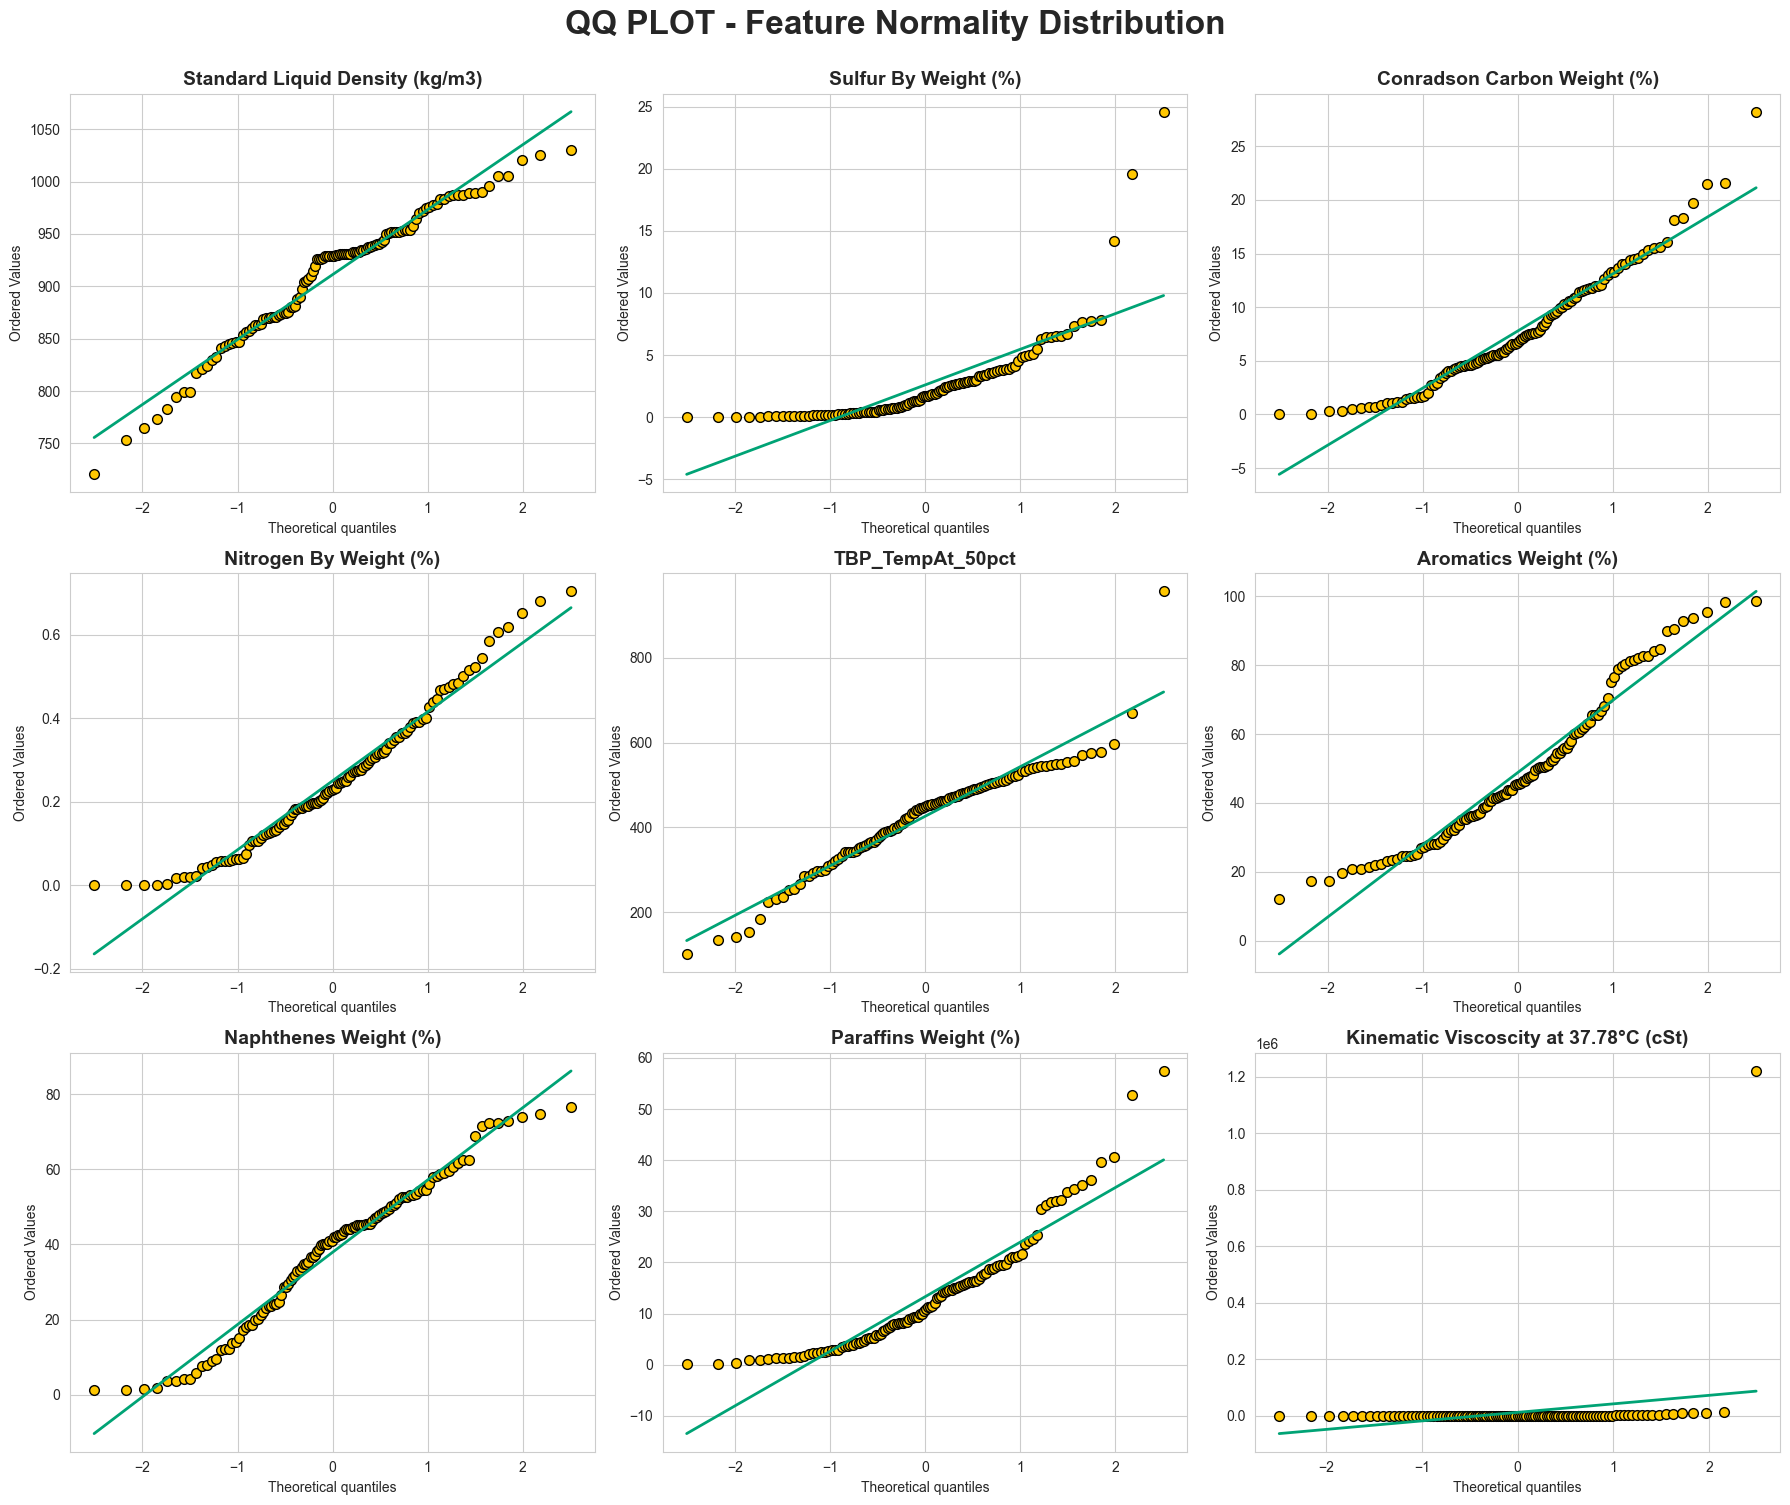

In [161]:
#Plotting QQ Plot to detect outliers
sns.set_style("whitegrid")

qq = [
    ('StdLiqDensity_kgm3', 'Standard Liquid Density (kg/m3)'),
    ('SulfurWt_pct', 'Sulfur By Weight (%)'),
    ('ConradsonCarbon_wt_pct', 'Conradson Carbon Weight (%)'),
    ('NitrogenWt_pct', 'Nitrogen By Weight (%)'),
    ('TBP_TempAt_50pct', 'TBP_TempAt_50pct'),
    ('AromWt_pct', 'Aromatics Weight (%)'),
    ('NaphWt_pct', 'Naphthenes Weight (%)'),
    ('ParaWt_pct', 'Paraffins Weight (%)'),
    ('KV_37.78c_cSt', 'Kinematic Viscoscity at 37.78°C (cSt)'),
    ('KV_98.89c_cSt', 'Kinematic Viscoscity at 98.89°C (cSt)'),
]

fig, axes = plt.subplots(3, 3, figsize=(18, 15))
fig.suptitle("QQ PLOT - Feature Normality Distribution", fontsize=24, fontweight="bold",y=1)
axes = axes.flatten()
for ax in axes[len(qq):]:
    ax.axis('off')

for ax, (col, title) in zip(axes, qq):
    stats.probplot(df[col].dropna(), dist="norm", plot=ax)

    lines = ax.get_lines()
    lines[1].set_color("#00A375")
    lines[1].set_linewidth(2)

    lines[0].set_markerfacecolor('#FFC700')
    lines[0].set_markeredgecolor('black')
    lines[0].set_markersize(7)

    ax.set_title(title, fontsize=14, fontweight="bold")
plt.tight_layout()
plt.show()

### 4.2 BIVARIATE ANALYSIS
#### 4.2.1 Scatter Plots - Independent Variables vs Output Set 1 

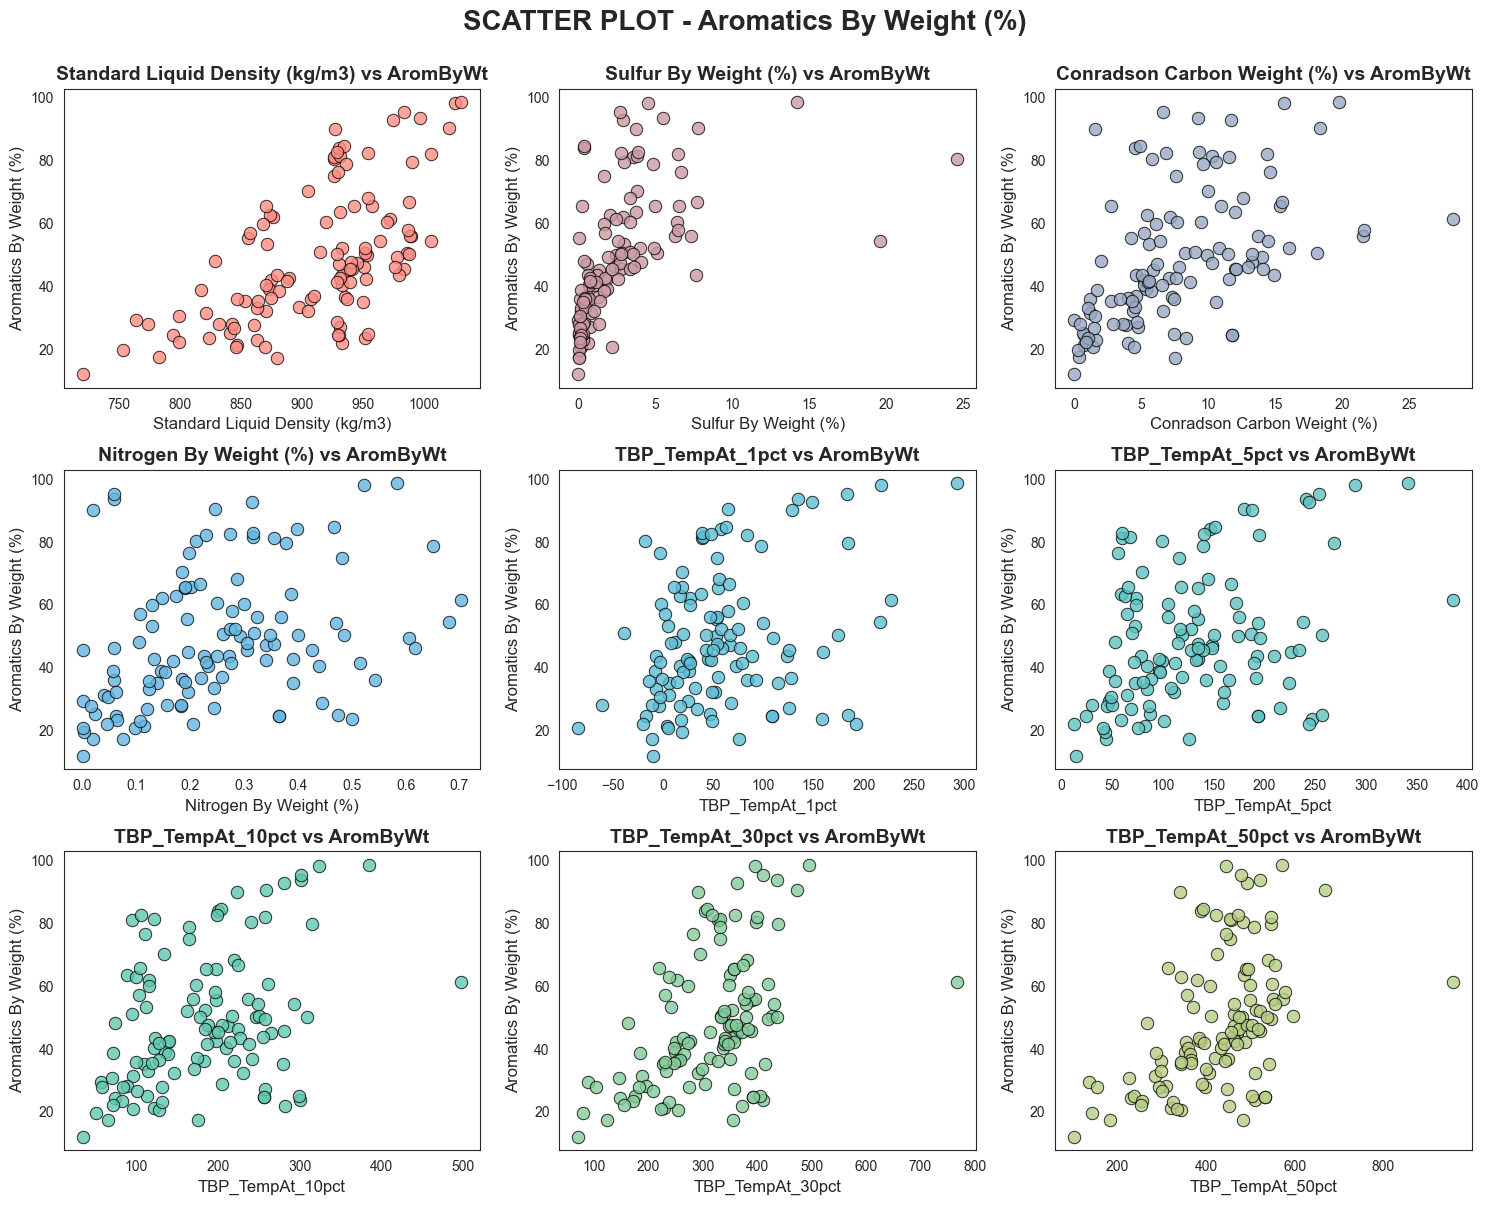

In [153]:
features=['StdLiqDensity_kgm3', 'SulfurWt_pct', 'ConradsonCarbon_wt_pct', 'NitrogenWt_pct',
          'TBP_TempAt_10pct', 'TBP_TempAt_50pct','TBP_TempAt_90pct']

output=['AromWt_pct']
sns.set_style("white")       
fig, axes = plt.subplots(nrows=3, ncols=3, figsize=(15, 12))
fig.suptitle("SCATTER PLOT - Aromatics By Weight (%)", fontsize=20, fontweight="bold",y=1)
axes = axes.flatten()

for ax, (col, color, title) in zip(axes, columns):
    sns.scatterplot(x=df[col].squeeze(), y=df[output].squeeze(), ax=ax, color=color, edgecolors='black', s=80, alpha=0.8)
    ax.set_xlabel(title, fontsize=12)           
    ax.set_ylabel('Aromatics By Weight (%)', fontsize=12)
    ax.set_title(f'{title} vs AromByWt', fontsize=14, fontweight='bold')

plt.tight_layout()
plt.show()

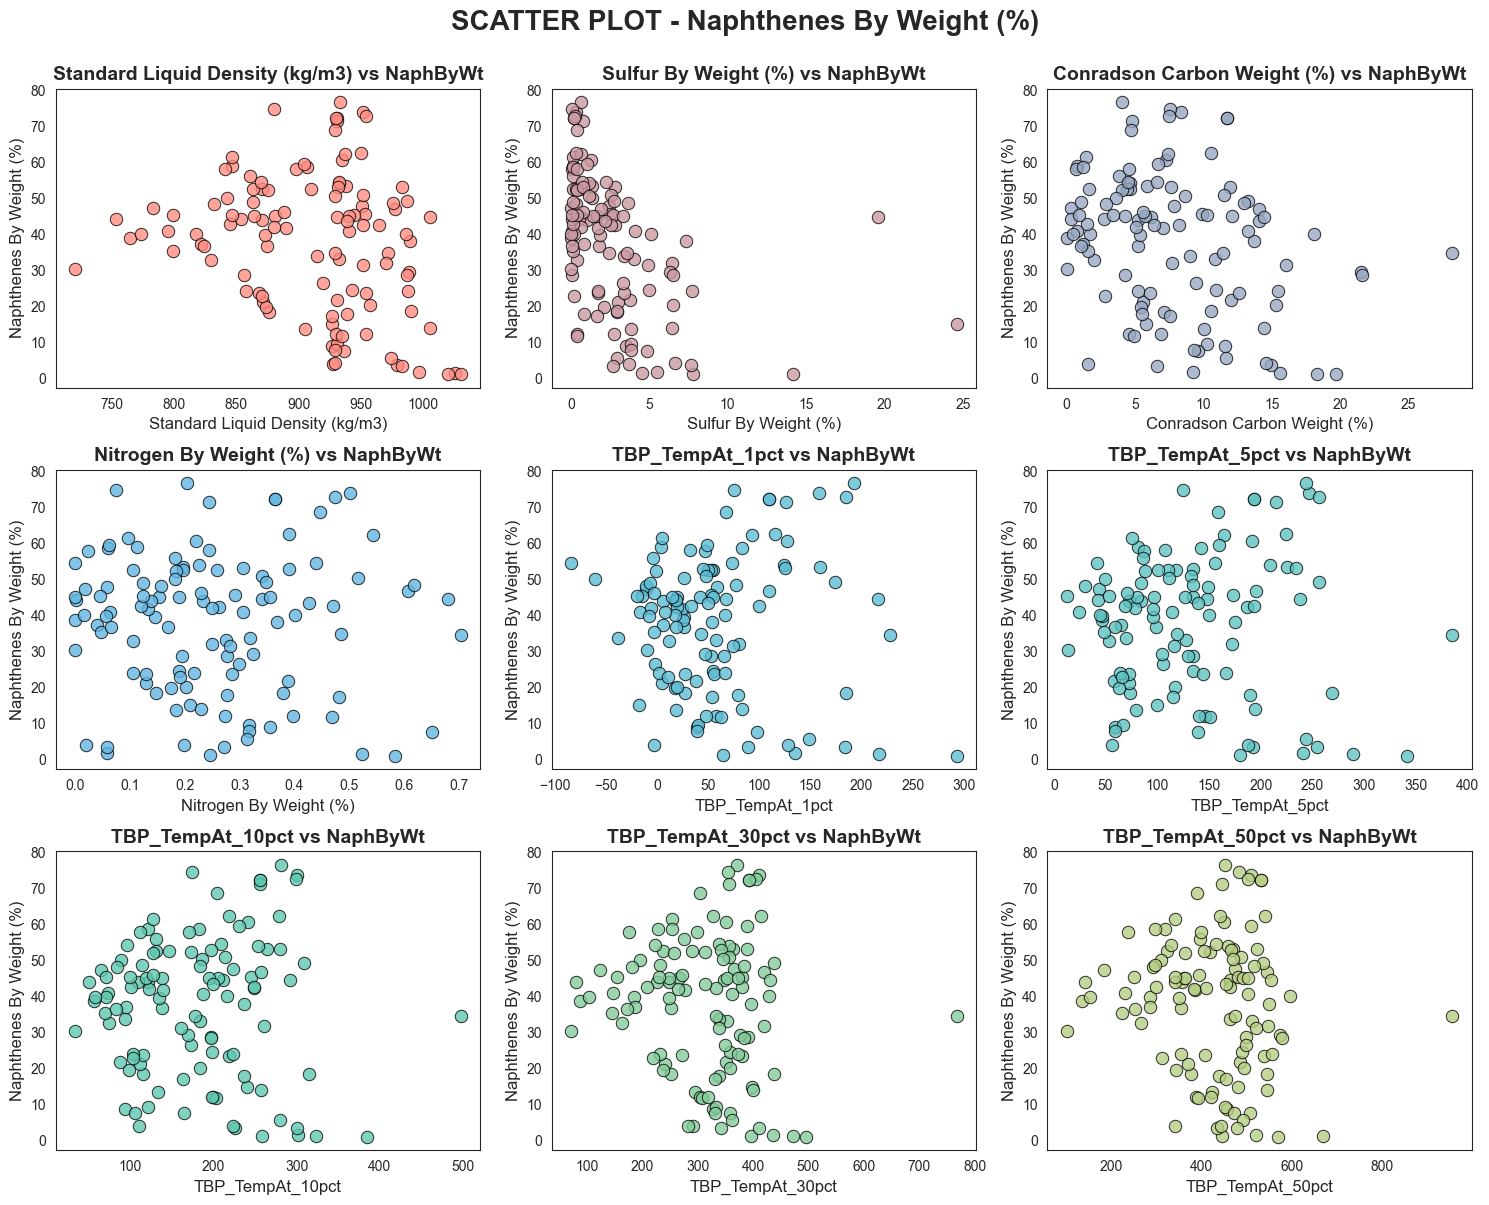

In [154]:
features=['StdLiqDensity_kgm3', 'SulfurWt_pct', 'ConradsonCarbon_wt_pct', 'NitrogenWt_pct',
          'TBP_TempAt_10pct', 'TBP_TempAt_50pct','TBP_TempAt_90pct']

output=['NaphWt_pct']
sns.set_style("white")       
fig, axes = plt.subplots(nrows=3, ncols=3, figsize=(15, 12))
fig.suptitle("SCATTER PLOT - Naphthenes By Weight (%)", fontsize=20, fontweight="bold",y=1)
axes = axes.flatten()

for ax, (col, color, title) in zip(axes, columns):
    sns.scatterplot(x=df[col].squeeze(), y=df[output].squeeze(), ax=ax, color=color, edgecolors='black', s=80, alpha=0.8)
    ax.set_xlabel(title, fontsize=12)           
    ax.set_ylabel('Naphthenes By Weight (%)', fontsize=12)
    ax.set_title(f'{title} vs NaphByWt', fontsize=14, fontweight='bold')

plt.tight_layout()
plt.show()

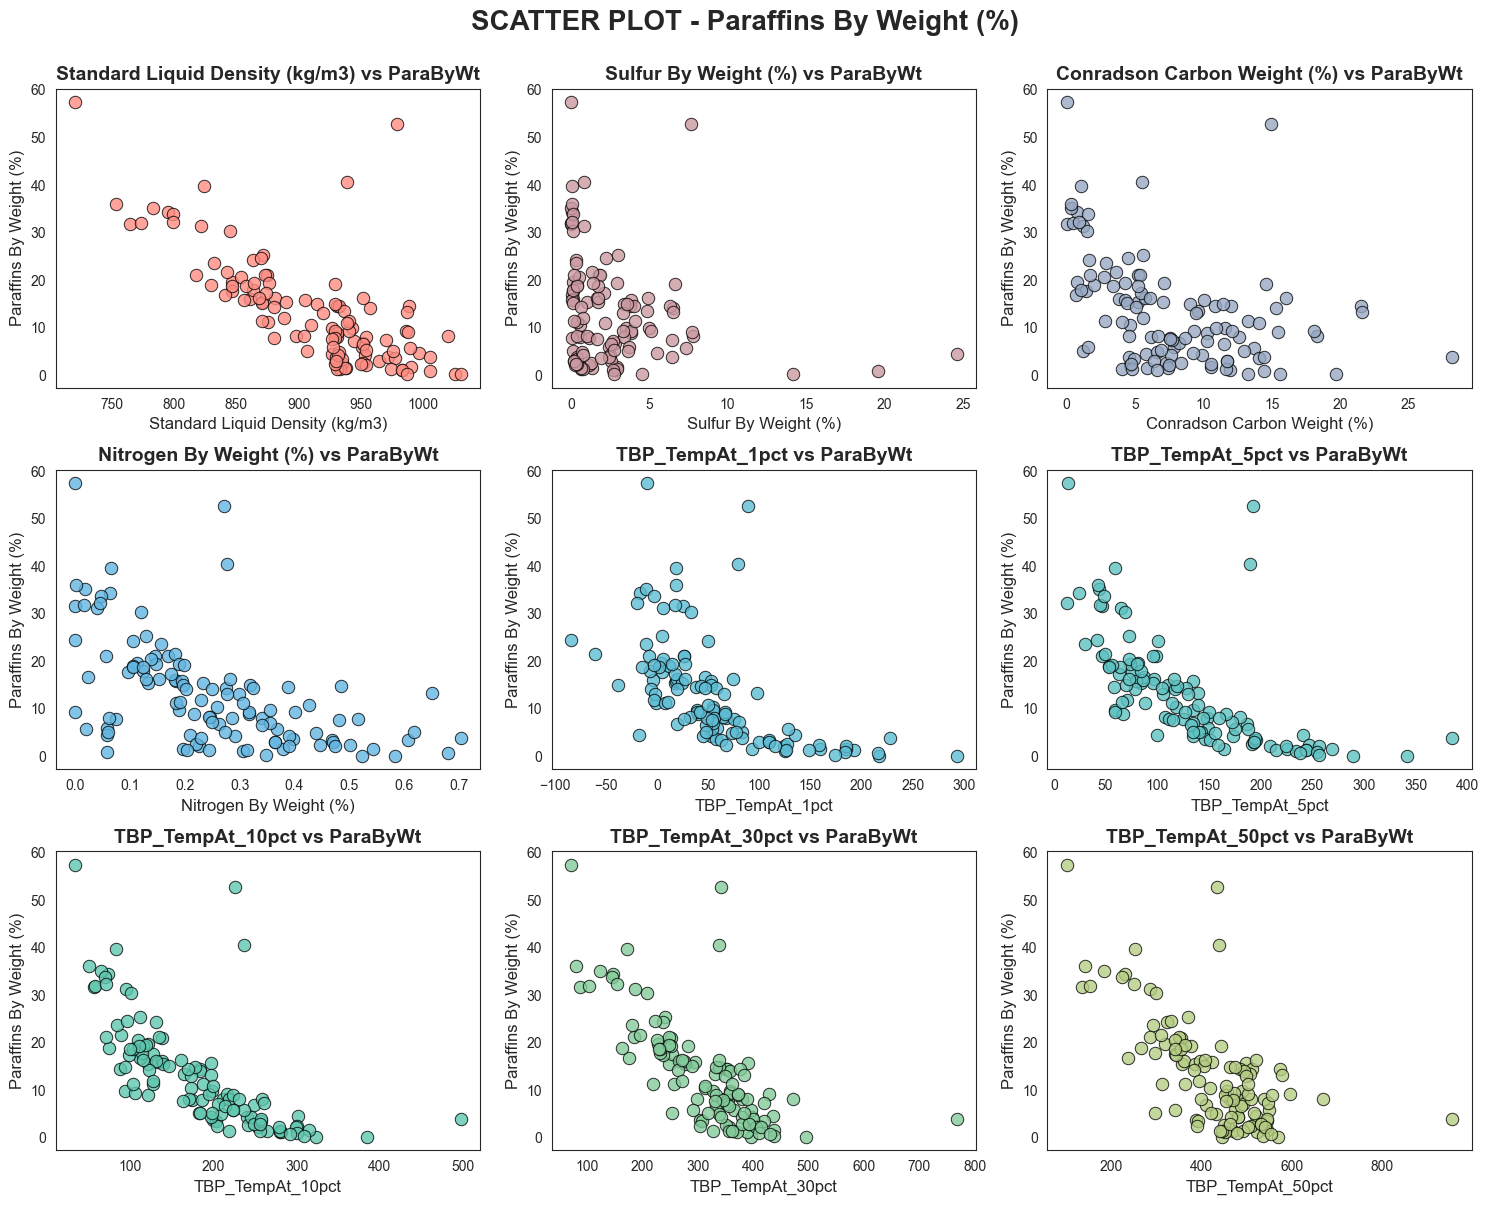

In [155]:
features=['StdLiqDensity_kgm3', 'SulfurWt_pct', 'ConradsonCarbon_wt_pct', 'NitrogenWt_pct',
          'TBP_TempAt_10pct', 'TBP_TempAt_50pct','TBP_TempAt_90pct']

output=['ParaWt_pct']
sns.set_style("white")       
fig, axes = plt.subplots(nrows=3, ncols=3, figsize=(15, 12))
fig.suptitle("SCATTER PLOT - Paraffins By Weight (%)", fontsize=20, fontweight="bold",y=1)
axes = axes.flatten()

for ax, (col, color, title) in zip(axes, columns):
    sns.scatterplot(x=df[col].squeeze(), y=df[output].squeeze(), ax=ax, color=color, edgecolors='black', s=80, alpha=0.8)
    ax.set_xlabel(title, fontsize=12)           
    ax.set_ylabel('Paraffins By Weight (%)', fontsize=12)
    ax.set_title(f'{title} vs ParaByWt', fontsize=14, fontweight='bold')

plt.tight_layout()
plt.show()

#### 4.2.2 Scatter Plots - Independent Variables vs Output Set 2

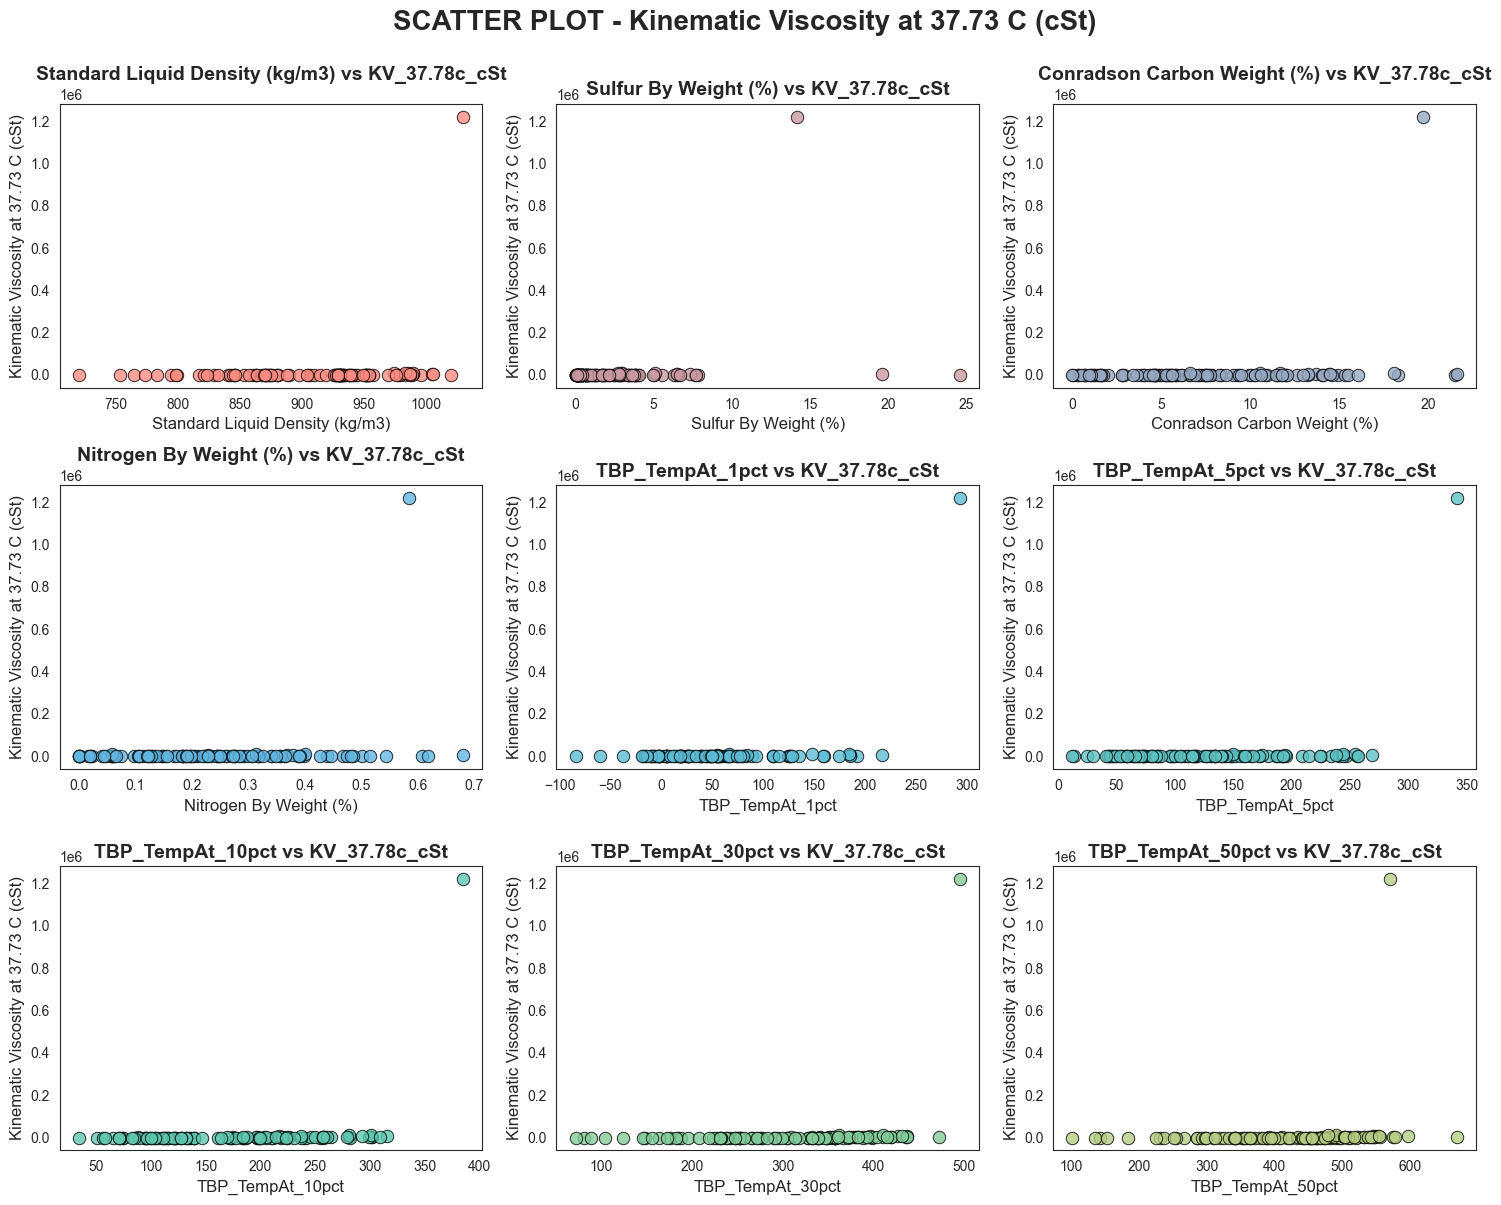

In [156]:
features=['StdLiqDensity_kgm3', 'SulfurWt_pct', 'ConradsonCarbon_wt_pct', 'NitrogenWt_pct',
          'TBP_TempAt_10pct', 'TBP_TempAt_50pct','TBP_TempAt_90pct']

output=['KV_37.78c_cSt']
sns.set_style("white")       
fig, axes = plt.subplots(nrows=3, ncols=3, figsize=(15, 12))
fig.suptitle("SCATTER PLOT - Kinematic Viscosity at 37.73 C (cSt)", fontsize=20, fontweight="bold",y=1)
axes = axes.flatten()

for ax, (col, color, title) in zip(axes, columns):
    sns.scatterplot(x=df[col].squeeze(), y=df[output].squeeze(), ax=ax, color=color, edgecolors='black', s=80, alpha=0.8)
    ax.set_xlabel(title, fontsize=12)           
    ax.set_ylabel('Kinematic Viscosity at 37.73 C (cSt)', fontsize=12)
    ax.set_title(f'{title} vs KV_37.78c_cSt', fontsize=14, fontweight='bold')

plt.tight_layout()
plt.show()

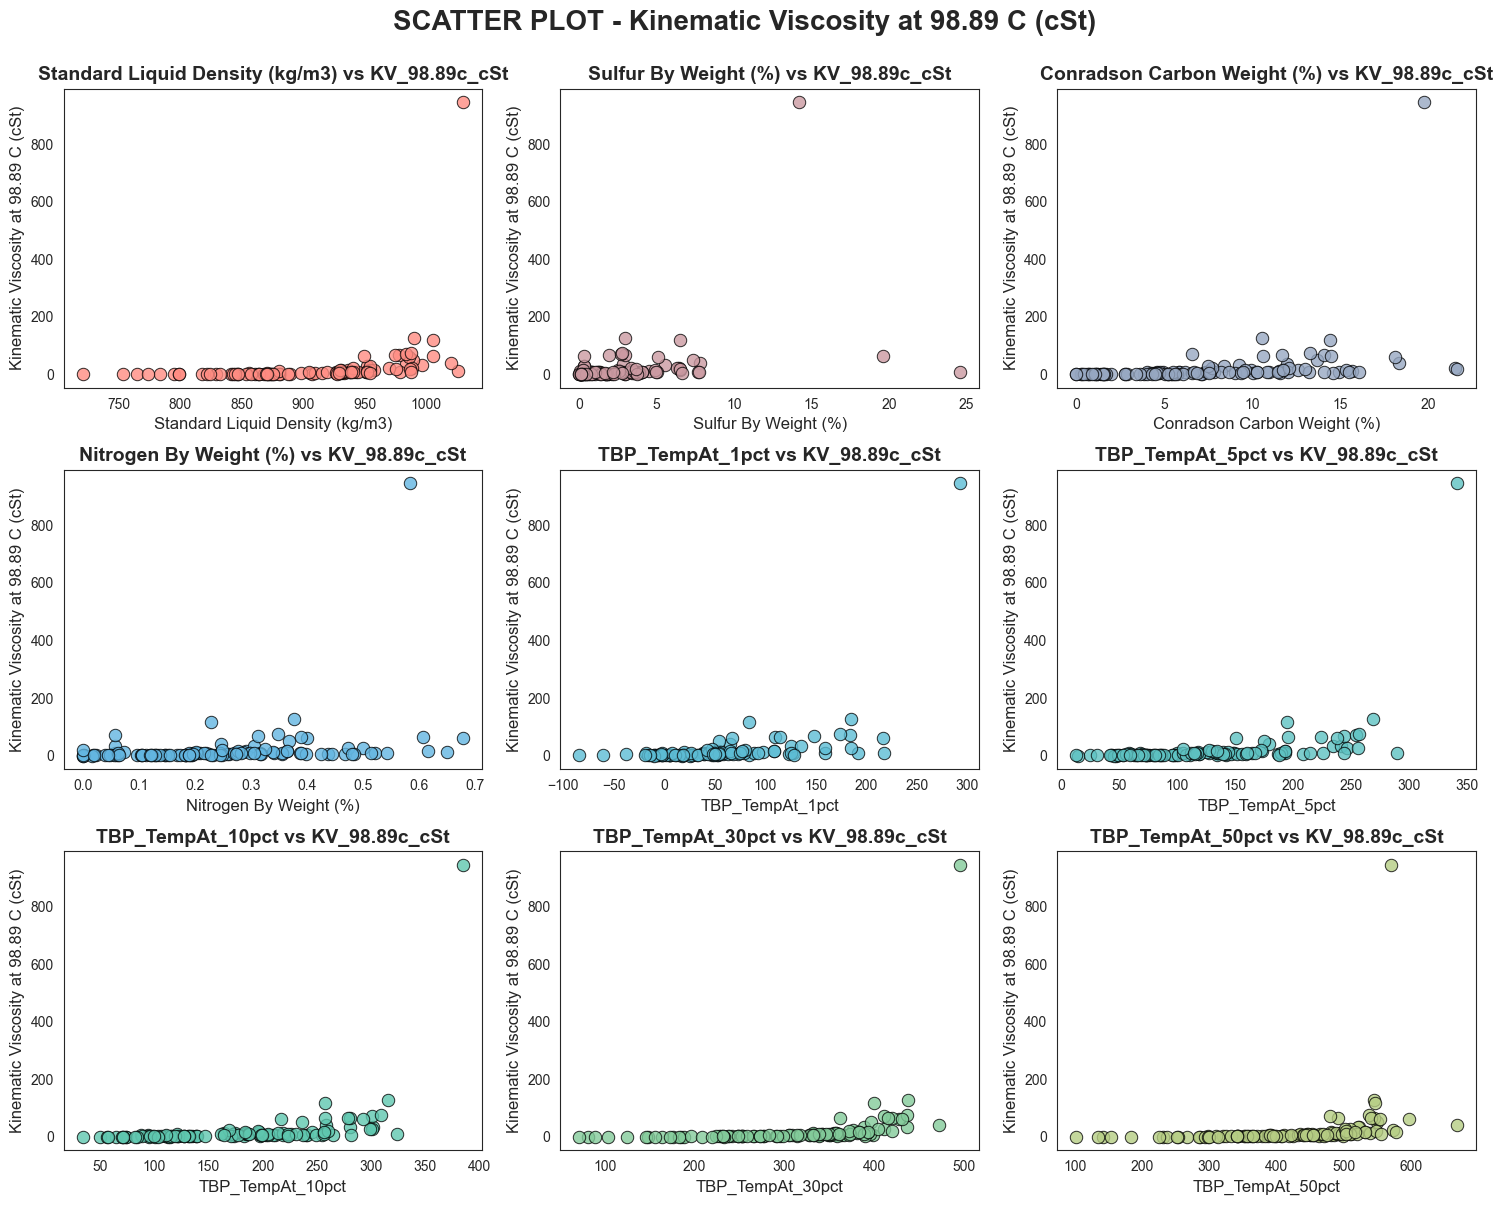

In [157]:
features=['StdLiqDensity_kgm3', 'SulfurWt_pct', 'ConradsonCarbon_wt_pct', 'NitrogenWt_pct',
          'TBP_TempAt_10pct', 'TBP_TempAt_50pct','TBP_TempAt_90pct']

output=['KV_98.89c_cSt']
sns.set_style("white")       
fig, axes = plt.subplots(nrows=3, ncols=3, figsize=(15, 12))
fig.suptitle("SCATTER PLOT - Kinematic Viscosity at 98.89 C (cSt)", fontsize=20, fontweight="bold",y=1)
axes = axes.flatten()

for ax, (col, color, title) in zip(axes, columns):
    sns.scatterplot(x=df[col].squeeze(), y=df[output].squeeze(), ax=ax, color=color, edgecolors='black', s=80, alpha=0.8)
    ax.set_xlabel(title, fontsize=12)           
    ax.set_ylabel('Kinematic Viscosity at 98.89 C (cSt)', fontsize=12)
    ax.set_title(f'{title} vs KV_98.89c_cSt', fontsize=14, fontweight='bold')

plt.tight_layout()
plt.show()

#### 4.2.3 Stacked Bar Chart - Composition Analysis

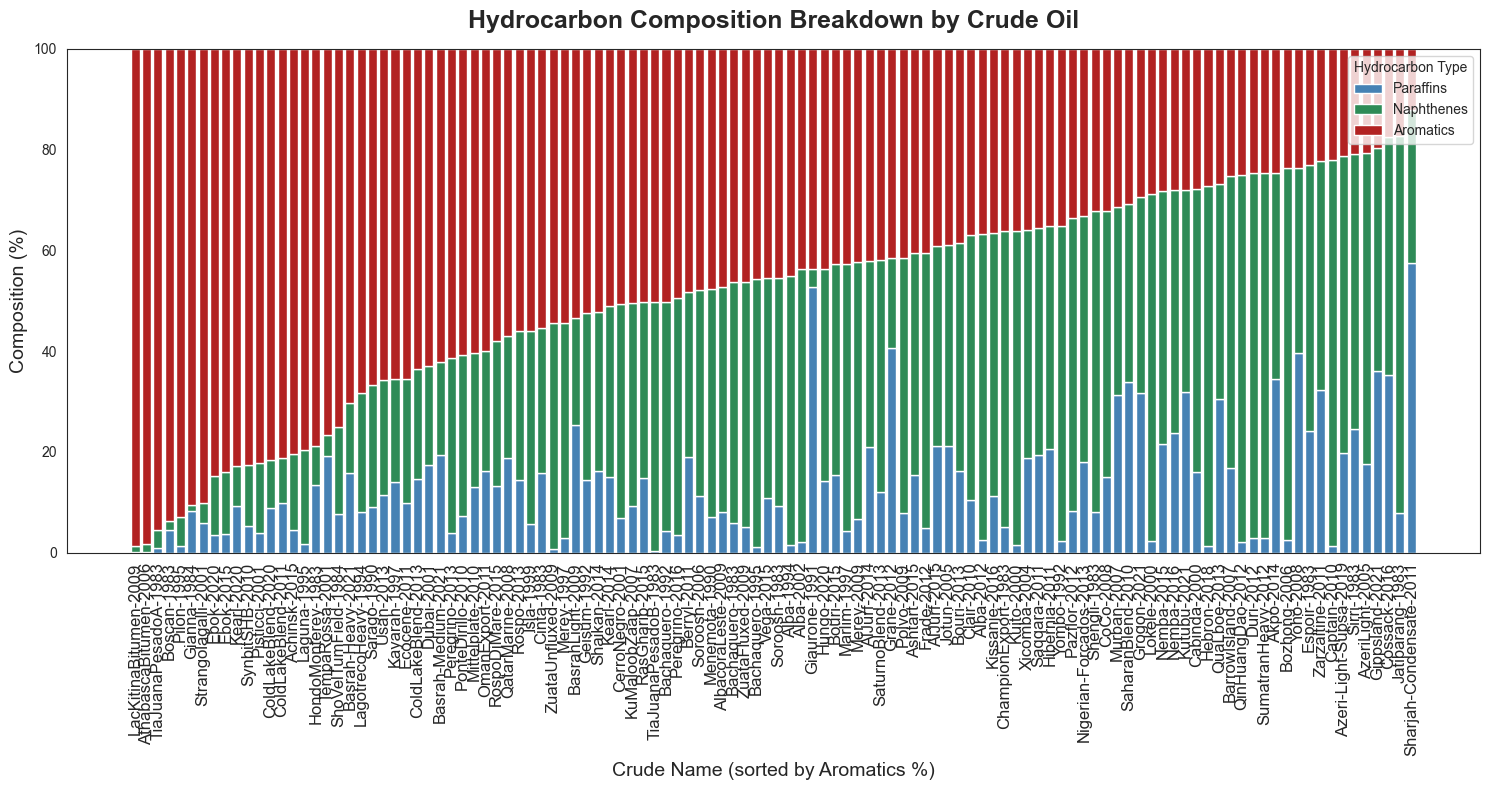

In [158]:
sns.set_style("white")

df_sorted = df.sort_values(by="AromWt_pct", ascending=False).reset_index(drop=True)
crude_names = df_sorted["Crude_Name"]

para = df_sorted["ParaWt_pct"]
naph = df_sorted["NaphWt_pct"]
arom = df_sorted["AromWt_pct"]
plt.figure(figsize=(15, 8))

plt.bar(crude_names, para, label="Paraffins", color="steelblue")
plt.bar(crude_names, naph, bottom=para, label="Naphthenes", color="seagreen")
plt.bar(crude_names, arom, bottom=para + naph, label="Aromatics", color="firebrick")
plt.ylabel("Composition (%)", fontsize=14)
plt.xlabel("Crude Name (sorted by Aromatics %)", fontsize=14)
plt.title( "Hydrocarbon Composition Breakdown by Crude Oil", fontsize=18, fontweight="bold", pad=15)

plt.ylim(0, 100)
plt.xticks(rotation=90, fontsize=12)
plt.legend(title="Hydrocarbon Type", loc="upper right")
plt.tight_layout()
plt.show()


### 4.3 MULTIVARIATE ANALYSIS
#### 4.3.1 Pairwise Relationships

Text(0.5, 1.02, 'PAIRPLOT - Feature Relationships')

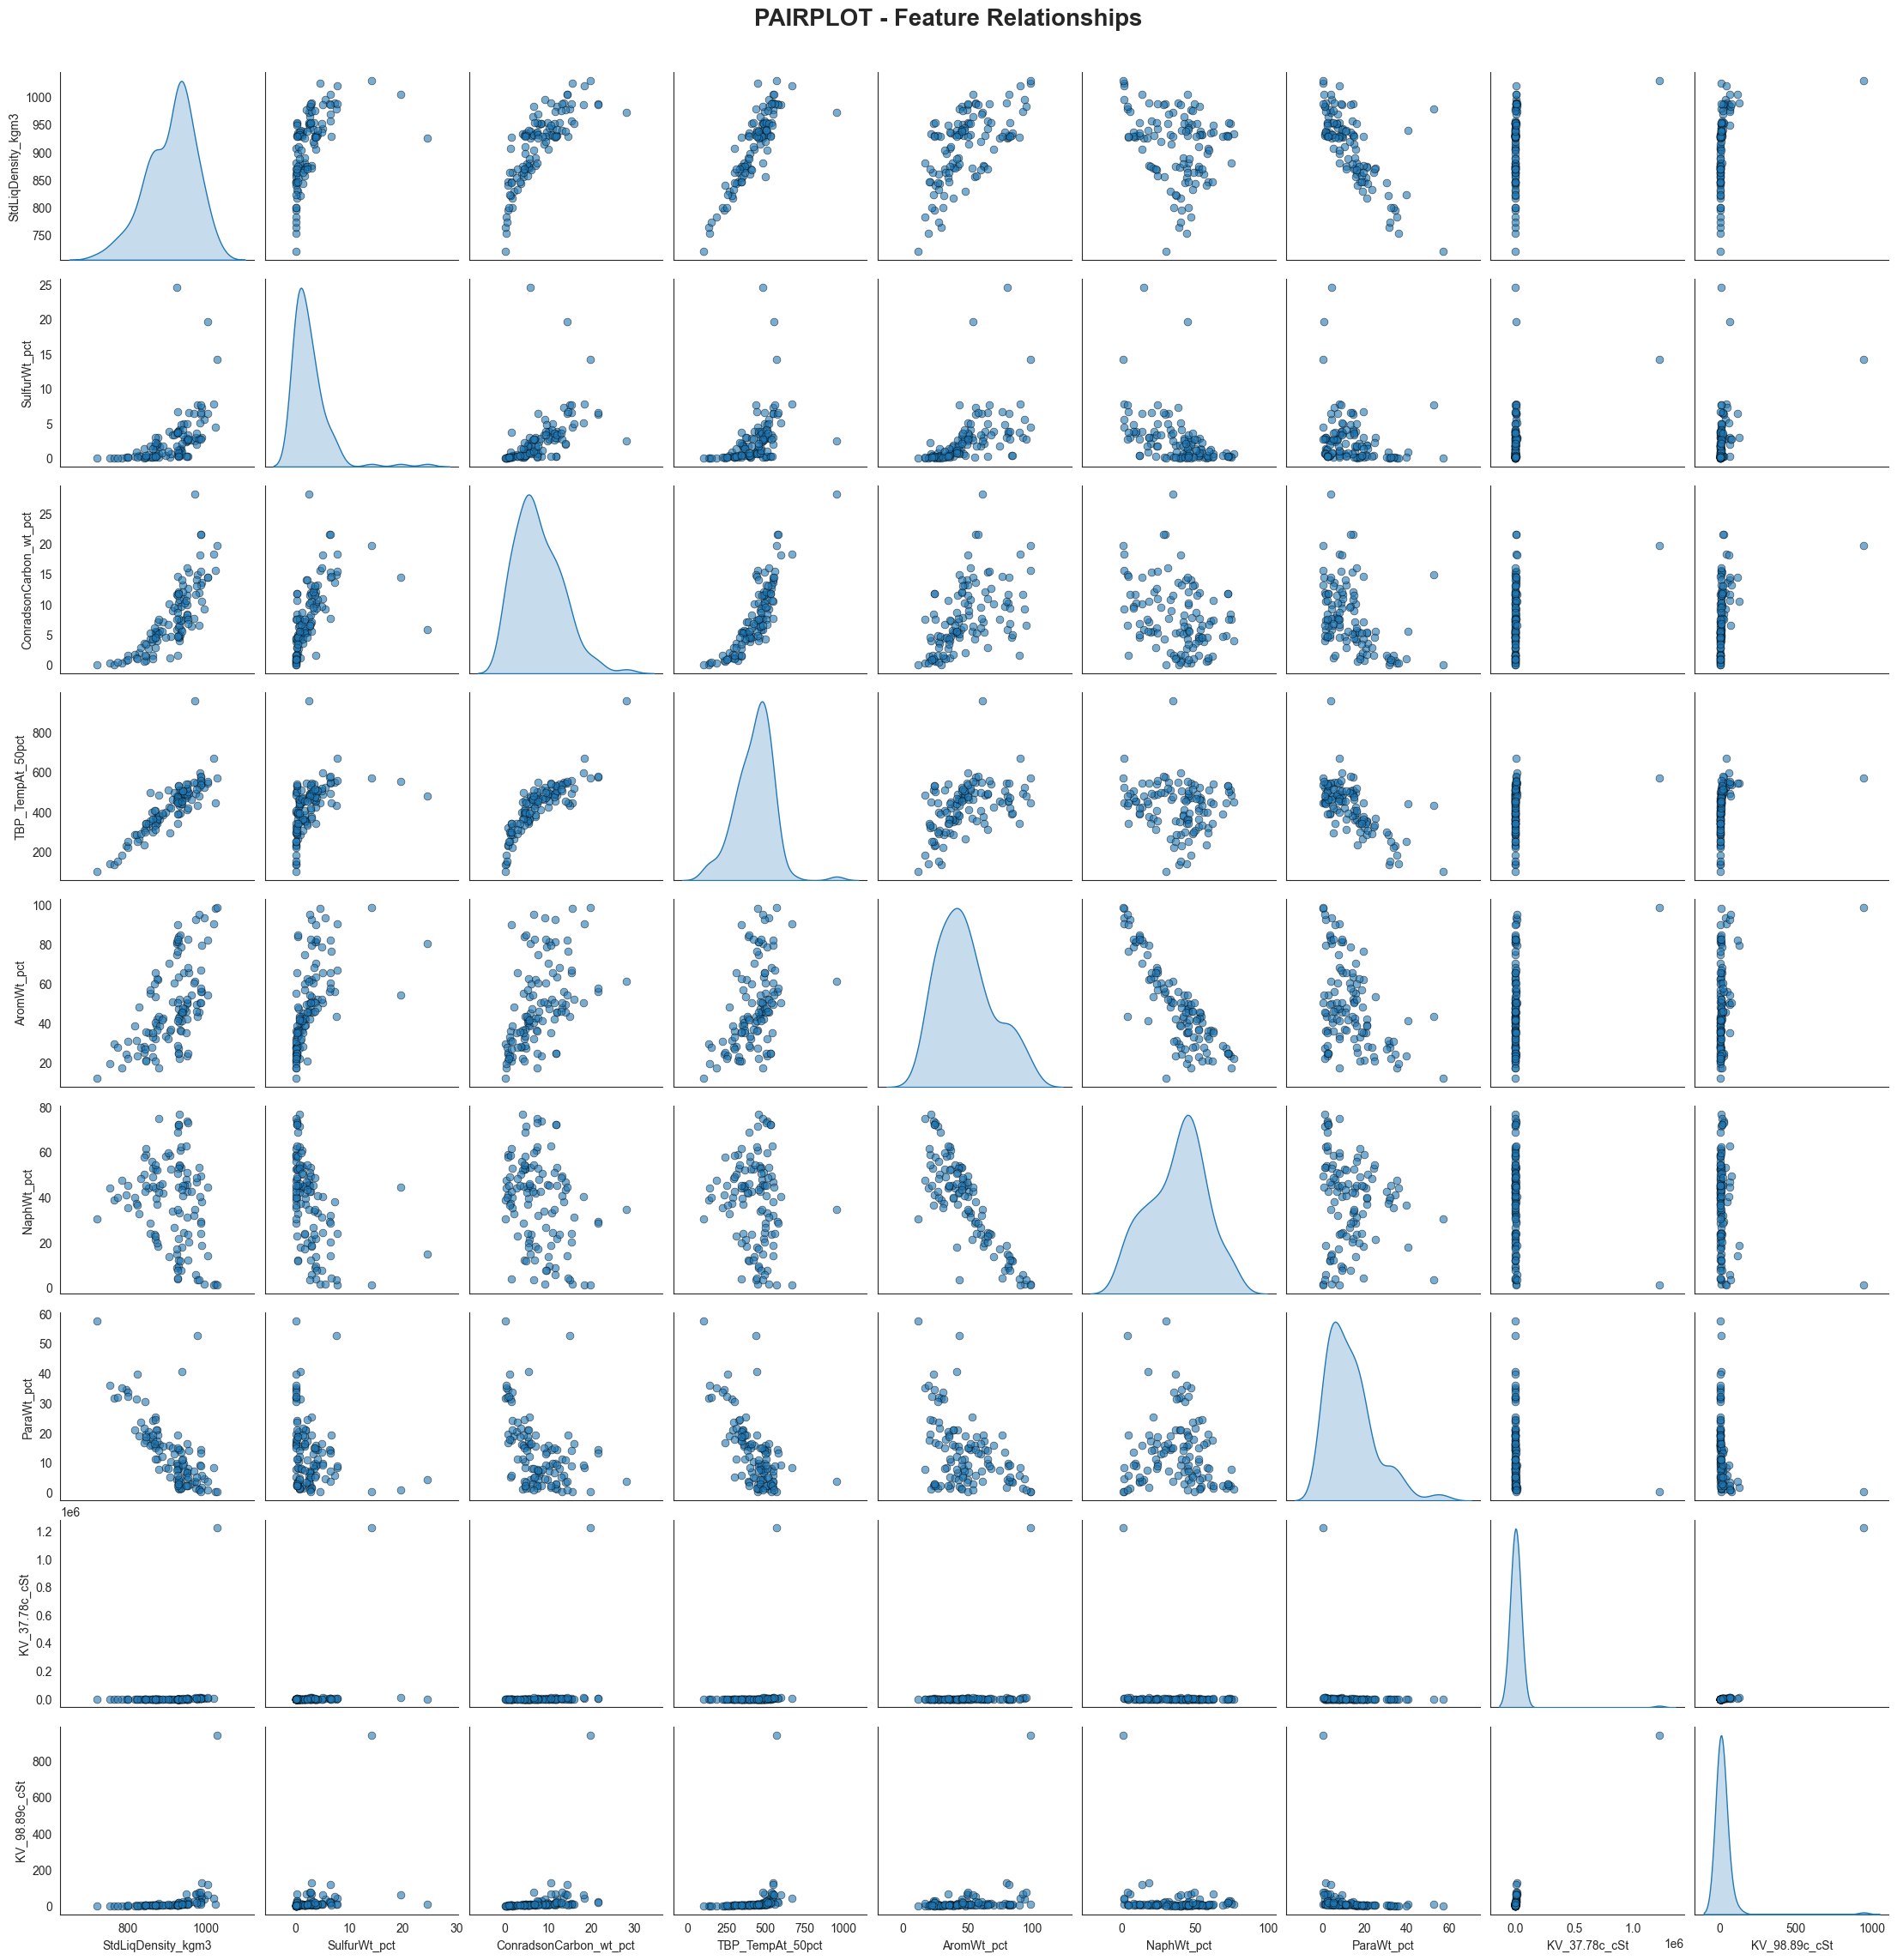

In [159]:
variables = ['StdLiqDensity_kgm3', 'SulfurWt_pct', 'ConradsonCarbon_wt_pct','TBP_TempAt_50pct',
             'AromWt_pct', 'NaphWt_pct', 'ParaWt_pct', 'KV_37.78c_cSt', 'KV_98.89c_cSt']

sns.pairplot(df[variables], diag_kind='kde', plot_kws={'alpha':0.6, 's':40, 'edgecolor':'k'})
plt.suptitle("PAIRPLOT - Feature Relationships", fontsize=20, fontweight="bold",y=1.02)

#### 4.3.2 Correlation Map

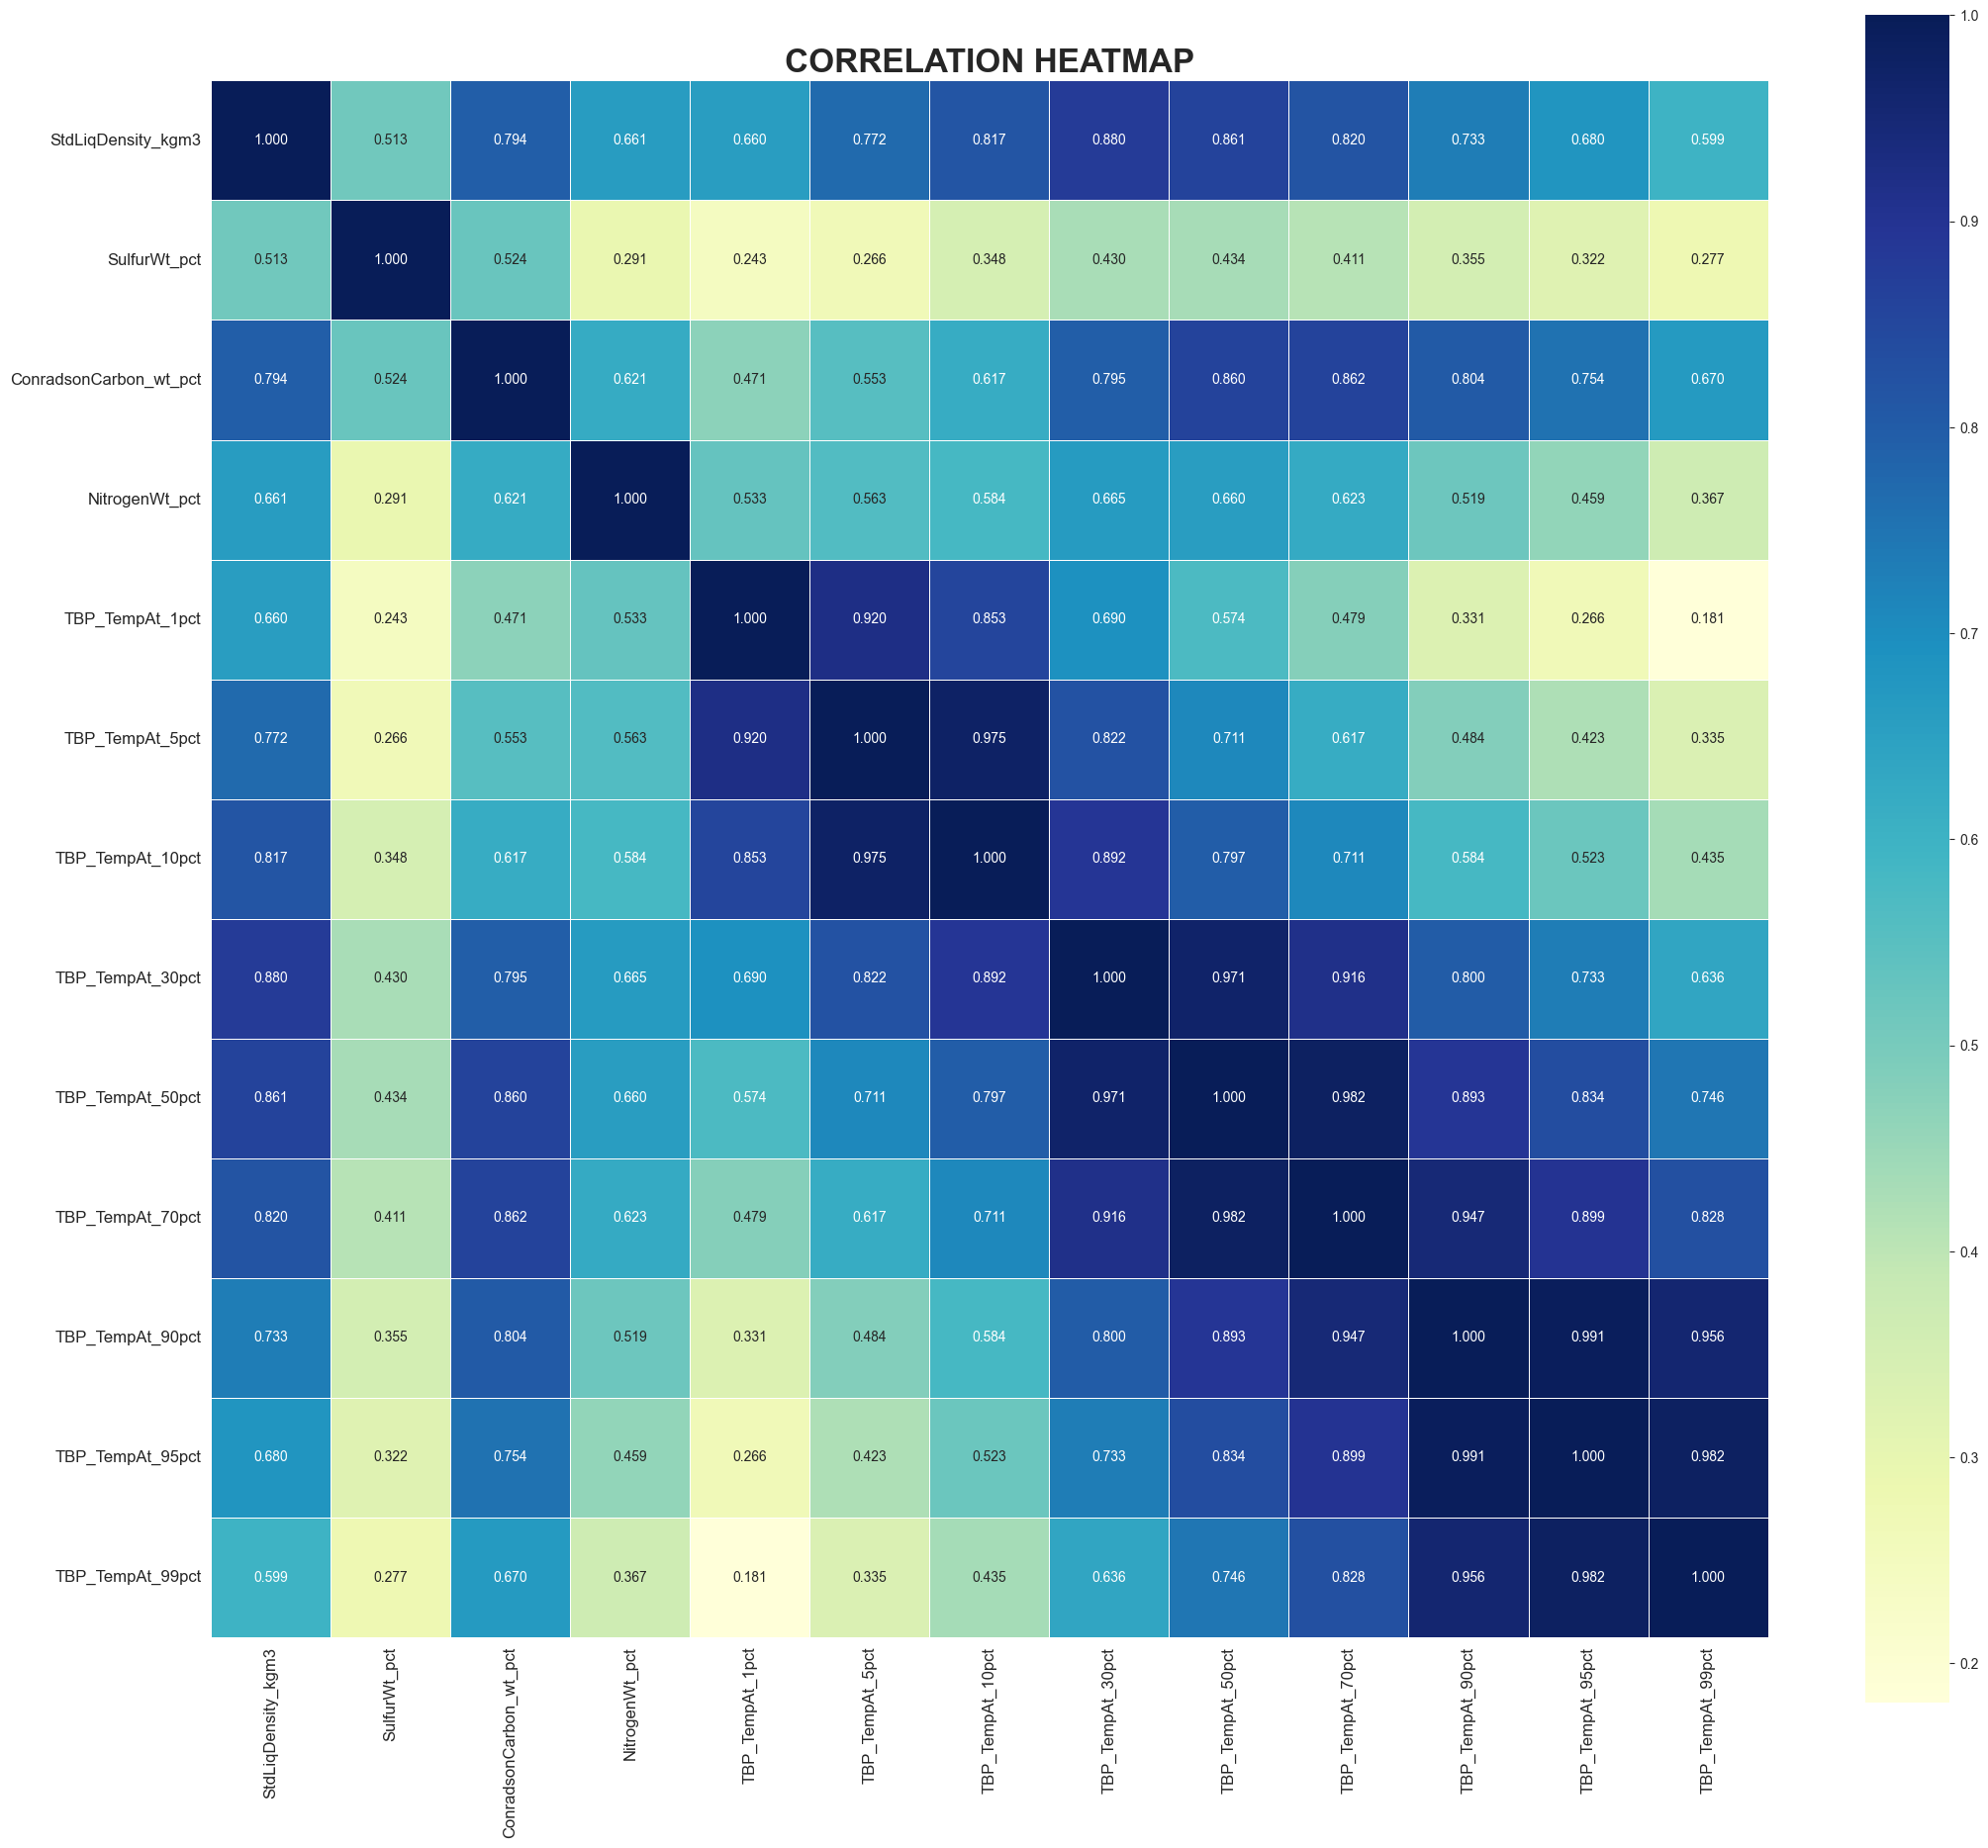

In [160]:
variables = ['StdLiqDensity_kgm3', 'SulfurWt_pct', 'ConradsonCarbon_wt_pct', 'NitrogenWt_pct','TBP_TempAt_1pct', 'TBP_TempAt_5pct', 'TBP_TempAt_10pct', 
            'TBP_TempAt_30pct', 'TBP_TempAt_50pct', 'TBP_TempAt_70pct', 'TBP_TempAt_90pct', 'TBP_TempAt_95pct', 'TBP_TempAt_99pct']
#Correlation matrix
corr_matrix = df[variables].corr()

#Plot heatmap
plt.figure(figsize=(22, 22))
sns.heatmap(corr_matrix, annot=True, fmt=".3f", cmap='YlGnBu', square=True, cbar_kws={"shrink": 0.8}, linewidths=0.7)

plt.title('CORRELATION HEATMAP', fontsize=24, fontweight='bold', y=1)
plt.xticks(fontsize=12) 
plt.yticks(fontsize=12)
plt.tight_layout()
plt.show()
